In [1]:
# импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from ast import literal_eval
from pandas.io.json import json_normalize
import json

%matplotlib inline

In [2]:
# загрузка датасета в датафрейм
game_df = pd.read_csv('TZ_GP (2).csv')

In [3]:
game_df.head()

,user_id,media_source,client_time,session_index,game_status,event_name,event_data
0,60c588d7b4d1b24b40531f29,organic,2021-06-05 07:23:06,1,"{""coins"":0,""freeRounds"":0,""freeUndo"":0,""freeWi...",appInstall,"{""device"":""Xiaomi POCO M2 Pro"",""graphicMemory""..."
1,60d34c7ab4d1b24b405324ac,organic,2021-06-05 16:33:26,1,"{""coins"":0,""freeRounds"":0,""freeUndo"":0,""freeWi...",appInstall,"{""device"":""samsung SM-J200G"",""graphicMemory"":2..."
2,60babef87c80da6a9442cb86,ad-traffic,2021-06-05 00:02:07,1,"{""coins"":0,""freeRounds"":0,""freeUndo"":0,""freeWi...",appInstall,"{""device"":""samsung SM-G781B"",""graphicMemory"":2..."
3,60bac0e912667e6a8d107731,ad-traffic,2021-06-05 00:04:29,1,"{""coins"":0,""freeRounds"":0,""freeUndo"":0,""freeWi...",appInstall,"{""device"":""samsung SM-T290"",""graphicMemory"":51..."
4,60babfb17c80da6a9442cb87,organic,2021-06-05 00:05:16,1,"{""coins"":0,""freeRounds"":0,""freeUndo"":0,""freeWi...",appInstall,"{""device"":""samsung SM-N960F"",""graphicMemory"":2..."


In [4]:
game_df.shape

(396099, 7)

Данные были успешно загружены.

## Предобработка данных
1. Распаковка json-столбцов
2. Преобразование типов
3. Устранение пропусков
4. Устранение дубликатов
5. Переименовывание столбцов
6. Оценка валидности и корректности
7. Просмотр описательных статистик

### Распаковка json-столбцов

Столбцы game_status и event_data содержат данные в json-формате; эти столбцы нужно распаковать в колонки датафрейма. 
Для столбца game_status преобразование будет осуществляться в блоке предобработки данных, для столбца event_data - по мере работы с событиями.

In [5]:
game_df['game_status'] = game_df['game_status'].apply(literal_eval)

In [6]:
# распаковка столбца game_data_status в отдельный датафрейм
data_game_status = pd.json_normalize(data = game_df['game_status'], 
                            meta =['coins', 'freeRounds', 'freeUndo', 'freeWildCard', 'freeAddCards','level', 'map', 'bet', 
                                   'gladeId', 'league', 'VIPPointsAmount', 'VIPStatus', 'gameType'])

In [7]:
data_game_status.head()

,coins,freeRounds,freeUndo,freeWildCard,freeAddCards,level,map,bet,gladeId,league,VIPPointsAmount,VIPStatus,gameType
0,0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
1,0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
2,0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
3,0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
4,0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN


Распаковка json-формата из столбца game_status в отдельный датафрейм прошла успешно.
Теперь нужно объединить датафреймы game_df и data_game_status.

In [8]:
# перевод индексов строк в отдельную колонку (для объединения датафреймов по этому столбцу)
data_game_status.reset_index(level=0, inplace=True)
game_df.reset_index(level=0, inplace=True)

In [9]:
data_game_status

,index,coins,freeRounds,freeUndo,freeWildCard,freeAddCards,level,map,bet,gladeId,league,VIPPointsAmount,VIPStatus,gameType
0,0,0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
1,1,0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
2,2,0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
3,3,0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
4,4,0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396094,396094,1174190,30,305,30,121,262,2,3.0,13.0,0.0,0.0,0.0,NaN
396095,396095,7885,0,394,0,162,289,2,3.0,14.0,1.0,0.0,0.0,NaN
396096,396096,107885,0,394,0,162,289,2,3.0,14.0,1.0,0.0,0.0,NaN
396097,396097,45274,0,3,2,4,48,1,3.0,3.0,1.0,NaN,NaN,NaN


In [10]:
game_df

,index,user_id,media_source,client_time,session_index,game_status,event_name,event_data
0,0,60c588d7b4d1b24b40531f29,organic,2021-06-05 07:23:06,1,"{'coins': 0, 'freeRounds': 0, 'freeUndo': 0, '...",appInstall,"{""device"":""Xiaomi POCO M2 Pro"",""graphicMemory""..."
1,1,60d34c7ab4d1b24b405324ac,organic,2021-06-05 16:33:26,1,"{'coins': 0, 'freeRounds': 0, 'freeUndo': 0, '...",appInstall,"{""device"":""samsung SM-J200G"",""graphicMemory"":2..."
2,2,60babef87c80da6a9442cb86,ad-traffic,2021-06-05 00:02:07,1,"{'coins': 0, 'freeRounds': 0, 'freeUndo': 0, '...",appInstall,"{""device"":""samsung SM-G781B"",""graphicMemory"":2..."
3,3,60bac0e912667e6a8d107731,ad-traffic,2021-06-05 00:04:29,1,"{'coins': 0, 'freeRounds': 0, 'freeUndo': 0, '...",appInstall,"{""device"":""samsung SM-T290"",""graphicMemory"":51..."
4,4,60babfb17c80da6a9442cb87,organic,2021-06-05 00:05:16,1,"{'coins': 0, 'freeRounds': 0, 'freeUndo': 0, '...",appInstall,"{""device"":""samsung SM-N960F"",""graphicMemory"":2..."
...,...,...,...,...,...,...,...,...
396094,396094,60bb2f3912667e6a8d107757,organic,2021-06-12 11:52:41,54,"{'coins': 1174190, 'freeRounds': 30, 'freeUndo...",transactionComplete,"{""inLevel"":false,""usdProceed"":68.1768094378241..."
396095,396095,60bb2f3912667e6a8d107757,organic,2021-06-12 15:18:06,57,"{'coins': 7885, 'freeRounds': 0, 'freeUndo': 3...",transactionComplete,"{""inLevel"":false,""usdProceed"":6.81001009386441..."
396096,396096,60bb2f3912667e6a8d107757,organic,2021-06-12 15:18:30,57,"{'coins': 107885, 'freeRounds': 0, 'freeUndo':...",transactionComplete,"{""inLevel"":false,""usdProceed"":13.6285433543043..."
396097,396097,60bc090c12667e6a8d1077b8,organic,2021-06-12 22:48:26,2,"{'coins': 45274, 'freeRounds': 0, 'freeUndo': ...",transactionComplete,"{""inLevel"":false,""usdProceed"":1.393,""productDe..."


In [11]:
# объединение датафреймов game_df и data_game_status (по столбцу index)
data = game_df.merge(data_game_status, on='index')

In [12]:
data

,index,user_id,media_source,client_time,session_index,game_status,event_name,event_data,coins,freeRounds,...,freeWildCard,freeAddCards,level,map,bet,gladeId,league,VIPPointsAmount,VIPStatus,gameType
0,0,60c588d7b4d1b24b40531f29,organic,2021-06-05 07:23:06,1,"{'coins': 0, 'freeRounds': 0, 'freeUndo': 0, '...",appInstall,"{""device"":""Xiaomi POCO M2 Pro"",""graphicMemory""...",0,0,...,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
1,1,60d34c7ab4d1b24b405324ac,organic,2021-06-05 16:33:26,1,"{'coins': 0, 'freeRounds': 0, 'freeUndo': 0, '...",appInstall,"{""device"":""samsung SM-J200G"",""graphicMemory"":2...",0,0,...,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
2,2,60babef87c80da6a9442cb86,ad-traffic,2021-06-05 00:02:07,1,"{'coins': 0, 'freeRounds': 0, 'freeUndo': 0, '...",appInstall,"{""device"":""samsung SM-G781B"",""graphicMemory"":2...",0,0,...,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
3,3,60bac0e912667e6a8d107731,ad-traffic,2021-06-05 00:04:29,1,"{'coins': 0, 'freeRounds': 0, 'freeUndo': 0, '...",appInstall,"{""device"":""samsung SM-T290"",""graphicMemory"":51...",0,0,...,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
4,4,60babfb17c80da6a9442cb87,organic,2021-06-05 00:05:16,1,"{'coins': 0, 'freeRounds': 0, 'freeUndo': 0, '...",appInstall,"{""device"":""samsung SM-N960F"",""graphicMemory"":2...",0,0,...,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396094,396094,60bb2f3912667e6a8d107757,organic,2021-06-12 11:52:41,54,"{'coins': 1174190, 'freeRounds': 30, 'freeUndo...",transactionComplete,"{""inLevel"":false,""usdProceed"":68.1768094378241...",1174190,30,...,30,121,262,2,3.0,13.0,0.0,0.0,0.0,NaN
396095,396095,60bb2f3912667e6a8d107757,organic,2021-06-12 15:18:06,57,"{'coins': 7885, 'freeRounds': 0, 'freeUndo': 3...",transactionComplete,"{""inLevel"":false,""usdProceed"":6.81001009386441...",7885,0,...,0,162,289,2,3.0,14.0,1.0,0.0,0.0,NaN
396096,396096,60bb2f3912667e6a8d107757,organic,2021-06-12 15:18:30,57,"{'coins': 107885, 'freeRounds': 0, 'freeUndo':...",transactionComplete,"{""inLevel"":false,""usdProceed"":13.6285433543043...",107885,0,...,0,162,289,2,3.0,14.0,1.0,0.0,0.0,NaN
396097,396097,60bc090c12667e6a8d1077b8,organic,2021-06-12 22:48:26,2,"{'coins': 45274, 'freeRounds': 0, 'freeUndo': ...",transactionComplete,"{""inLevel"":false,""usdProceed"":1.393,""productDe...",45274,0,...,2,4,48,1,3.0,3.0,1.0,NaN,NaN,NaN


Объединение датафреймов в датафрейм data произошло успешно, количество записей (рядов) осталость прежним, данные не были потеряны.
Информация из столбца game_status уже содержится в отдельных колонках датафрейма, поэтому данный столбец можно удалить.

In [13]:
# удаление столбца game_status
data = data.drop('game_status', axis=1)

In [14]:
data

,index,user_id,media_source,client_time,session_index,event_name,event_data,coins,freeRounds,freeUndo,freeWildCard,freeAddCards,level,map,bet,gladeId,league,VIPPointsAmount,VIPStatus,gameType
0,0,60c588d7b4d1b24b40531f29,organic,2021-06-05 07:23:06,1,appInstall,"{""device"":""Xiaomi POCO M2 Pro"",""graphicMemory""...",0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
1,1,60d34c7ab4d1b24b405324ac,organic,2021-06-05 16:33:26,1,appInstall,"{""device"":""samsung SM-J200G"",""graphicMemory"":2...",0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
2,2,60babef87c80da6a9442cb86,ad-traffic,2021-06-05 00:02:07,1,appInstall,"{""device"":""samsung SM-G781B"",""graphicMemory"":2...",0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
3,3,60bac0e912667e6a8d107731,ad-traffic,2021-06-05 00:04:29,1,appInstall,"{""device"":""samsung SM-T290"",""graphicMemory"":51...",0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
4,4,60babfb17c80da6a9442cb87,organic,2021-06-05 00:05:16,1,appInstall,"{""device"":""samsung SM-N960F"",""graphicMemory"":2...",0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396094,396094,60bb2f3912667e6a8d107757,organic,2021-06-12 11:52:41,54,transactionComplete,"{""inLevel"":false,""usdProceed"":68.1768094378241...",1174190,30,305,30,121,262,2,3.0,13.0,0.0,0.0,0.0,NaN
396095,396095,60bb2f3912667e6a8d107757,organic,2021-06-12 15:18:06,57,transactionComplete,"{""inLevel"":false,""usdProceed"":6.81001009386441...",7885,0,394,0,162,289,2,3.0,14.0,1.0,0.0,0.0,NaN
396096,396096,60bb2f3912667e6a8d107757,organic,2021-06-12 15:18:30,57,transactionComplete,"{""inLevel"":false,""usdProceed"":13.6285433543043...",107885,0,394,0,162,289,2,3.0,14.0,1.0,0.0,0.0,NaN
396097,396097,60bc090c12667e6a8d1077b8,organic,2021-06-12 22:48:26,2,transactionComplete,"{""inLevel"":false,""usdProceed"":1.393,""productDe...",45274,0,3,2,4,48,1,3.0,3.0,1.0,NaN,NaN,NaN


Удаление столбца game_status прошло успешно. 

### Преобразование типов

In [15]:
# вывод типов данных каждого столбца датафрейма
data.dtypes

index                int64
user_id             object
media_source        object
client_time         object
session_index        int64
event_name          object
event_data          object
coins                int64
freeRounds           int64
freeUndo             int64
freeWildCard         int64
freeAddCards         int64
level                int64
map                  int64
bet                float64
gladeId            float64
league             float64
VIPPointsAmount    float64
VIPStatus          float64
gameType           float64
dtype: object

Тип данных столбца client_time определен неверно; его нужно изменить с object на datetime.
Столбец event_data нужно распаковать из json в отдельные столбцы датафрейма, однако это будет сделано по мере работы с конкретными событиями.

In [16]:
# преобразование типа данных столбца client_time
data.client_time = pd.to_datetime(data.client_time)

In [17]:
data.dtypes

index                       int64
user_id                    object
media_source               object
client_time        datetime64[ns]
session_index               int64
event_name                 object
event_data                 object
coins                       int64
freeRounds                  int64
freeUndo                    int64
freeWildCard                int64
freeAddCards                int64
level                       int64
map                         int64
bet                       float64
gladeId                   float64
league                    float64
VIPPointsAmount           float64
VIPStatus                 float64
gameType                  float64
dtype: object

Преобразование типа данных столбца client_time прошло успешно.

### Устранение пропусков

In [18]:
# поиск пропущенных значений
data.isnull().sum()

index                  0
user_id                0
media_source           0
client_time            0
session_index          0
event_name             0
event_data             0
coins                  0
freeRounds             0
freeUndo               0
freeWildCard           0
freeAddCards           0
level                  0
map                    0
bet                  153
gladeId              153
league               154
VIPPointsAmount    40846
VIPStatus          40846
gameType           54386
dtype: int64

Предположительно, наличие пропущенных значений в колонках bet, gladeId, league, VIPPointsAmount, VIPStatus и gameType является допустимым (например, для колонки bet - при условии отсутствия ставки на данном уровне).

### Устранение дубликатов

In [19]:
# поиск дубликатов
data.duplicated().sum()

0

Дубликатов найдено не было. 

### Переименовывание столбцов

In [20]:
# вывод названий всех колонок датафрейма
data.columns

Index(['index', 'user_id', 'media_source', 'client_time', 'session_index',
       'event_name', 'event_data', 'coins', 'freeRounds', 'freeUndo',
       'freeWildCard', 'freeAddCards', 'level', 'map', 'bet', 'gladeId',
       'league', 'VIPPointsAmount', 'VIPStatus', 'gameType'],
      dtype='object')

Названия колонок корректны (нет пробелов, нет нечитаемых символов, нет кириллицы), поэтому в переименовывании столбцов нет необходимости.

### Оценка валидности и корректности

In [21]:
# просмотр уникальных значений в каждой колонке для визуальной оценки данных
for column in data:
    print('Уникальные значения колонки ' + column + ':')
    print(data[column].unique())
    print('\n')

Уникальные значения колонки index:
[     0      1      2 ... 396096 396097 396098]


Уникальные значения колонки user_id:
['60c588d7b4d1b24b40531f29' '60d34c7ab4d1b24b405324ac'
 '60babef87c80da6a9442cb86' '60bac0e912667e6a8d107731'
 '60babfb17c80da6a9442cb87' '60bac1ac4770af6a2faa055f'
 '60bac42973c31e6a292b7a3a' '60bbe18112667e6a8d1077aa'
 '60bac57712667e6a8d107734' '60bac5e912667e6a8d107735'
 '60bac5e273c31e6a292b7a3b' '60bac91d7c80da6a9442cb88'
 '60bac9e07c80da6a9442cb89' '60bacaee7c80da6a9442cb8a'
 '60bacc5e7c80da6a9442cb8b' '60bace5c7c80da6a9442cb8c'
 '60bad20e73c31e6a292b7a3d' '60bad14373c31e6a292b7a3c'
 '60bac4ba12667e6a8d107733' '60bad30a7c80da6a9442cb8d'
 '60bad30473c31e6a292b7a3e' '60bad5757c80da6a9442cb8e'
 '60bad5fe73c31e6a292b7a40' '60bbc0a473c31e6a292b7ac0'
 '60bad6b84770af6a2faa0561' '60bad7ba73c31e6a292b7a42'
 '60badd6373c31e6a292b7a44' '60bad7f17c80da6a9442cb90'
 '60bad8307c80da6a9442cb91' '60bad89e73c31e6a292b7a43'
 '60bad6d673c31e6a292b7a41' '60badbc712667e6a8d107737

['2021-06-05T07:23:06.000000000' '2021-06-05T16:33:26.000000000'
 '2021-06-05T00:02:07.000000000' ... '2021-06-11T08:56:02.000000000'
 '2021-06-11T09:25:47.000000000' '2021-06-06T21:45:48.000000000']


Уникальные значения колонки session_index:
[  1   2   3   4  17 156  54   9  62 173  72 103  64  41 109  28  11  27
  68  24  18  14   8   5  44  12 104  30   7  73  10  23  31  16  51  15
  34  29 175  66  42  20  26  19  45  85   6  40 105  97  32  57 178 136
  69  38  55  71  78  79  48  43  13  36  22  65  98 181 101  33  60  84
  52  95  53 102 112 115  21 116 121 122  49  99  50 185  46 137  86 124
 125 127  61  25  63 135  47 138 145  35 108 186  37  58  80 123 139 153
 154 118  75 158  77 111 188  83  87  76 119 157  56 113  39 100 191 114
 128 194 141  89 242 120 189 199  88 107 117 190 129  74 203  91 130 142
 174 143  92  59 193 110 179 209 250 160 211 197 198  93 106  70 214 255
 201 144  90 218 219 184  94  67 220  81 131 225 207 149 166 132 228  82
 152 163 230  96 146 170 

In [22]:
# просмотр количества уникальных значений в каждой колонке для визуальной оценки данных
for column in data:
    print('Количество уникальных значений в колонке ' + column + ' составляет:')
    print(data[column].nunique())
    print('\n')

Количество уникальных значений в колонке index составляет:
396099


Количество уникальных значений в колонке user_id составляет:
452


Количество уникальных значений в колонке media_source составляет:
2


Количество уникальных значений в колонке client_time составляет:
212454


Количество уникальных значений в колонке session_index составляет:
248


Количество уникальных значений в колонке event_name составляет:
9


Количество уникальных значений в колонке event_data составляет:
72300


Количество уникальных значений в колонке coins составляет:
90322


Количество уникальных значений в колонке freeRounds составляет:
40


Количество уникальных значений в колонке freeUndo составляет:
87


Количество уникальных значений в колонке freeWildCard составляет:
61


Количество уникальных значений в колонке freeAddCards составляет:
56


Количество уникальных значений в колонке level составляет:
584


Количество уникальных значений в колонке map составляет:
4


Количество уникальных значений в коло

In [23]:
data.shape

(396099, 20)

Датафрейм содержит информацию о:
- 452 игроках
- 2 источниках установки
- 9 типах событий
- 396099 событиях

Данные валидны и корректны.

### Просмотр описательных статистик

In [24]:
# вывод описательных статистик
data.describe()

,index,session_index,coins,freeRounds,freeUndo,freeWildCard,freeAddCards,level,map,bet,gladeId,league,VIPPointsAmount,VIPStatus,gameType
count,396099.000000,396099.000000,3.960990e+05,396099.00000,396099.000000,396099.000000,396099.000000,396099.000000,396099.000000,395946.000000,395946.000000,395945.000000,355253.000000,355253.0,341713.0
mean,198049.000000,15.308903,4.958990e+04,0.17074,3.288991,1.692867,1.312472,99.292063,1.078440,1.349603,5.476956,0.272303,3.927015,0.0,0.0
std,114344.076475,27.443017,8.807644e+04,1.27476,18.028873,2.320175,7.228531,85.260655,0.284023,0.664380,3.701651,0.532143,8.506069,0.0,0.0
min,0.000000,1.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0
25%,99024.500000,2.000000,1.362500e+04,0.00000,0.000000,0.000000,0.000000,34.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.0,0.0
50%,198049.000000,5.000000,3.296000e+04,0.00000,1.000000,1.000000,0.000000,76.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.0,0.0
75%,297073.500000,16.000000,5.982600e+04,0.00000,3.000000,3.000000,1.000000,142.000000,1.000000,1.000000,7.000000,0.000000,3.000000,0.0,0.0
max,396098.000000,289.000000,2.396304e+06,60.00000,409.000000,60.000000,169.000000,589.000000,4.000000,3.000000,23.000000,3.000000,54.000000,0.0,0.0


Просмотр описательных статистик для столбцов index, session_index не несёт смысла, поскольку это порядковые величины, а не количественные. 

Выводы:
- данные были предобработаны, теперь они могут использоваться для анализа
- сырые данные были достаточно высокого качества (без дубликатов, с корректными заголовками столбцов, валидные)
- при загрузке данных был неверно распознан формат нескольких столбцов (3); формат одного из столбцов был изменен (с object на datetime), еще один столбец был распакован (из json в колонки датафрейма).

## Задание 1.1. FTUE

Используя предоставленный датасет, изучите воронку обучения и в целом вступление в игру.  
Сформулируйте гипотезы о том, что можно улучшить, подкрепите их данными. Обучение можно считать пройденным, когда пройдена первая грядка.

Интересующие события - appInstall, learning, gladeComplete (levels=1)

In [25]:
# отбор пользователей, установивших приложение
user_install = data.query('event_name == "appInstall"')

In [26]:
user_install

,index,user_id,media_source,client_time,session_index,event_name,event_data,coins,freeRounds,freeUndo,freeWildCard,freeAddCards,level,map,bet,gladeId,league,VIPPointsAmount,VIPStatus,gameType
0,0,60c588d7b4d1b24b40531f29,organic,2021-06-05 07:23:06,1,appInstall,"{""device"":""Xiaomi POCO M2 Pro"",""graphicMemory""...",0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
1,1,60d34c7ab4d1b24b405324ac,organic,2021-06-05 16:33:26,1,appInstall,"{""device"":""samsung SM-J200G"",""graphicMemory"":2...",0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
2,2,60babef87c80da6a9442cb86,ad-traffic,2021-06-05 00:02:07,1,appInstall,"{""device"":""samsung SM-G781B"",""graphicMemory"":2...",0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
3,3,60bac0e912667e6a8d107731,ad-traffic,2021-06-05 00:04:29,1,appInstall,"{""device"":""samsung SM-T290"",""graphicMemory"":51...",0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
4,4,60babfb17c80da6a9442cb87,organic,2021-06-05 00:05:16,1,appInstall,"{""device"":""samsung SM-N960F"",""graphicMemory"":2...",0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,447,60bc09767c80da6a9442cc20,organic,2021-06-05 23:32:15,1,appInstall,"{""device"":""vivo vivo 1901"",""graphicMemory"":102...",0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
448,448,60bc8f257c80da6a9442cc4d,organic,2021-06-05 23:40:00,1,appInstall,"{""device"":""realme RMX2189"",""graphicMemory"":102...",0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
449,449,60bc0d7973c31e6a292b7ad7,ad-traffic,2021-06-05 23:49:29,1,appInstall,"{""device"":""HUAWEI LDN-L21"",""graphicMemory"":102...",0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,NaN
450,450,60bc0f1c73c31e6a292b7ad8,organic,2021-06-05 23:56:17,1,appInstall,"{""device"":""OPPO CPH1819"",""graphicMemory"":1024,...",0,0,5,5,5,0,1,NaN,NaN,NaN,0.0,0.0,NaN


In [27]:
user_install.user_id.nunique()

452

In [28]:
amount_of_install_users = user_install.shape[0]

Датафрейм user_install содержит только информацию о пользователях, установивших приложение. Таких пользователей - 452. Это значение сохранено в переменной amount_of_install_users.

In [29]:
# отбор пользователей, прошедших хотя бы 1 шаг обучения
user_learning = data.query('event_name == "learning"') \
    .groupby('user_id') \
    .agg({'media_source':'count'}) \
    .rename(columns={'media_source':'amount_of_tips'})

In [30]:
user_learning

,amount_of_tips
user_id,
60ba837f4770af6a2faa0544,207
60ba999a73c31e6a292b7a2b,11
60babef87c80da6a9442cb86,29
60babfb17c80da6a9442cb87,5
60bac0e912667e6a8d107731,254
...,...
60c0f9783ecdcc5ea3f5039d,26
60c257584cc3a030299d2c79,14
60c588d7b4d1b24b40531f29,28


In [31]:
user_learning.shape

(446, 1)

In [32]:
amount_of_learned_users = user_learning.shape[0]

Датафрейм user_learning содержит информацию о всех пользователях, увидевших хотя бы одну туториальную подсказку. Таких пользователей - 446. Это значение сохранено в переменной amount_of_learned_users.

In [33]:
# отбор всех пользователей, прошедших хотя бы 1 грядку
user_completed = data.query('event_name =="gladeComplete"') \
    .groupby('user_id') \
    .agg({'media_source':'count'}) \
    .rename(columns={'media_source':'amount_of_glades'})

In [34]:
user_completed

,amount_of_glades
user_id,
60ba837f4770af6a2faa0544,3
60bac0e912667e6a8d107731,5
60bac1ac4770af6a2faa055f,6
60bac4ba12667e6a8d107733,5
60bac57712667e6a8d107734,7
...,...
60bc044d7c80da6a9442cc1d,5
60bc06c44770af6a2faa05ed,5
60bc090c12667e6a8d1077b8,3


In [35]:
user_completed.shape

(292, 1)

In [36]:
amount_of_completed_users = user_completed.shape[0]

Датафрейм user_completed содержит информацию о всех пользователях, прошедших по крайней мере 1 грядку. Таких пользователей - 292. Это значение сохранено в переменной amount_of_completed_users.

In [37]:
# вычисление процента пользователей, перешедших на следующий этап воронки
step_1 = round(amount_of_learned_users / amount_of_install_users * 100, 2)
step_2 = round(amount_of_completed_users / amount_of_learned_users * 100, 2)
step_1_2 = round(amount_of_completed_users / amount_of_install_users * 100, 2)

In [38]:
# переход от установки к обучению
step_1

98.67

In [39]:
# переход от обучения к прохождению грядок
step_2

65.47

In [40]:
# переход от установки к прохождению грядок
step_1_2

64.6

Выводы:
- из всех установивших приложение пользователй от установки к обучению перешло 98.67% 
- из всех прошедших обучение пользователей от обучения к прохождению грядок перешло 65.47% 
- из всех установивших приложение пользователей до прохождения хотя бы 1 грядки дошло 64.60%


## Анализ пользователей на каждом этапе воронки

In [41]:
pd.options.mode.chained_assignment = None 

### Анализ пользователей, установивших игру

In [42]:
user_install['event_data'] = user_install['event_data'].apply(literal_eval)

In [43]:
# распаковка столбца event_data в отдельный датафрейм
install_data = pd.json_normalize(data = user_install['event_data'], 
                            meta =['device', 'graphicMemory', 'systemMemory'])

In [44]:
install_data

,device,graphicMemory,systemMemory
0,Xiaomi POCO M2 Pro,2048,5582
1,samsung SM-J200G,256,892
2,samsung SM-G781B,2048,5562
3,samsung SM-T290,512,1847
4,samsung SM-N960F,2048,5616
...,...,...,...
447,vivo vivo 1901,1024,3809
448,realme RMX2189,1024,3807
449,HUAWEI LDN-L21,1024,2836
450,OPPO CPH1819,1024,3656


Распаковка json-формата прошла успешно.

In [45]:
# перевод индексов строк в отдельную колонку (для объединения датафреймов по этому столбцу)
install_data.reset_index(level=0, inplace=True)

In [46]:
# объединение датафреймов user_install и install_data (по столбцу index)
install = user_install.merge(install_data, on='index', how='left')

In [47]:
install.head()

,index,user_id,media_source,client_time,session_index,event_name,event_data,coins,freeRounds,freeUndo,...,map,bet,gladeId,league,VIPPointsAmount,VIPStatus,gameType,device,graphicMemory,systemMemory
0,0,60c588d7b4d1b24b40531f29,organic,2021-06-05 07:23:06,1,appInstall,"{'device': 'Xiaomi POCO M2 Pro', 'graphicMemor...",0,0,0,...,1,1.0,1.0,0.0,0.0,0.0,NaN,Xiaomi POCO M2 Pro,2048.0,5582.0
1,1,60d34c7ab4d1b24b405324ac,organic,2021-06-05 16:33:26,1,appInstall,"{'device': 'samsung SM-J200G', 'graphicMemory'...",0,0,0,...,1,1.0,1.0,0.0,0.0,0.0,NaN,samsung SM-J200G,256.0,892.0
2,2,60babef87c80da6a9442cb86,ad-traffic,2021-06-05 00:02:07,1,appInstall,"{'device': 'samsung SM-G781B', 'graphicMemory'...",0,0,0,...,1,1.0,1.0,0.0,0.0,0.0,NaN,samsung SM-G781B,2048.0,5562.0
3,3,60bac0e912667e6a8d107731,ad-traffic,2021-06-05 00:04:29,1,appInstall,"{'device': 'samsung SM-T290', 'graphicMemory':...",0,0,0,...,1,1.0,1.0,0.0,0.0,0.0,NaN,samsung SM-T290,512.0,1847.0
4,4,60babfb17c80da6a9442cb87,organic,2021-06-05 00:05:16,1,appInstall,"{'device': 'samsung SM-N960F', 'graphicMemory'...",0,0,0,...,1,1.0,1.0,0.0,0.0,0.0,NaN,samsung SM-N960F,2048.0,5616.0


Объединение датафреймов прошло успешно, данные не были потеряны (452 строки в каждом из объединяемых датафреймов, 452 строки в конечном датафрейме).
Информация из столбца event_data дублируется, данный столбец можно удалить.

In [48]:
# удаление столбца game_status
install = install.drop('event_data', axis=1)

In [49]:
install.head()

,index,user_id,media_source,client_time,session_index,event_name,coins,freeRounds,freeUndo,freeWildCard,...,map,bet,gladeId,league,VIPPointsAmount,VIPStatus,gameType,device,graphicMemory,systemMemory
0,0,60c588d7b4d1b24b40531f29,organic,2021-06-05 07:23:06,1,appInstall,0,0,0,0,...,1,1.0,1.0,0.0,0.0,0.0,NaN,Xiaomi POCO M2 Pro,2048.0,5582.0
1,1,60d34c7ab4d1b24b405324ac,organic,2021-06-05 16:33:26,1,appInstall,0,0,0,0,...,1,1.0,1.0,0.0,0.0,0.0,NaN,samsung SM-J200G,256.0,892.0
2,2,60babef87c80da6a9442cb86,ad-traffic,2021-06-05 00:02:07,1,appInstall,0,0,0,0,...,1,1.0,1.0,0.0,0.0,0.0,NaN,samsung SM-G781B,2048.0,5562.0
3,3,60bac0e912667e6a8d107731,ad-traffic,2021-06-05 00:04:29,1,appInstall,0,0,0,0,...,1,1.0,1.0,0.0,0.0,0.0,NaN,samsung SM-T290,512.0,1847.0
4,4,60babfb17c80da6a9442cb87,organic,2021-06-05 00:05:16,1,appInstall,0,0,0,0,...,1,1.0,1.0,0.0,0.0,0.0,NaN,samsung SM-N960F,2048.0,5616.0


In [50]:
# сохранение датафрейма install в csv-файл (для создания визуализаций на основе этих данных)
install.to_csv('install_game.csv')

Удаление столбца прошло успешно.

In [51]:
# подсчёт количества установок, сгруппированных по девайсам
devices = install.groupby('device', as_index=False) \
    .agg({'index':'count'}) \
    .sort_values(by='index', ascending=False) \
    .rename(columns={'index':'amount_of_installs'})

In [52]:
devices

,device,amount_of_installs
42,HUAWEI POT-LX1,6
124,Xiaomi M2003J15SC,6
218,samsung SM-A705FN,6
211,samsung SM-A505FN,6
203,samsung SM-A217F,6
...,...,...
115,TCL 8082_EEA,1
114,TCL 5059D,1
113,TCL 5033D_RU,1
112,TCL 5007Z,1


In [53]:
# отбор девайсов, на которые игру игру скачивали максимальное количество раз
devices.query('amount_of_installs == amount_of_installs.max()') \
    .sort_values(by='amount_of_installs').device.tolist()

['HUAWEI POT-LX1',
 'Xiaomi M2003J15SC',
 'samsung SM-A705FN',
 'samsung SM-A505FN',
 'samsung SM-A217F']

In [54]:
# ... минимальное количество раз
devices.query('amount_of_installs == amount_of_installs.min()') \
    .sort_values(by='amount_of_installs').device.tolist()

['samsung SM-A5260',
 'HUAWEI SLA-L22',
 'HUAWEI JSN-L21',
 'HUAWEI RNE-L01',
 'HUAWEI PPA-LX3',
 'HUAWEI PPA-LX2',
 'HUAWEI PAR-LX9',
 'HUAWEI MAR-LX1B',
 'HUAWEI MAR-LX1A',
 'HUAWEI JNY-LX1',
 'HUAWEI BAC-L21',
 'HUAWEI JAT-LX1',
 'HUAWEI JAT-L41',
 'HUAWEI ATU-L21',
 'HUAWEI INE-LX1r',
 'HUAWEI DUB-LX2',
 'HUAWEI BAH2-W19',
 'OPPO CPH1903',
 'OPPO CPH1969',
 'motorola moto g(6) plus',
 'Xiaomi POCO M2 Pro',
 'Xiaomi Redmi Note 8',
 'Xiaomi Redmi Note 4',
 'Xiaomi Redmi Go',
 'Xiaomi Redmi 7',
 'Xiaomi Redmi 6A',
 'Xiaomi Redmi 5A',
 'HUAWEI DUB-LX3',
 'Xiaomi POCO F1',
 'HUAWEI AMN-LX9',
 'Blackview A80Pro',
 'OPPO A37fw',
 'OPPO A33f',
 'Multilaser M7S_LITE',
 'LGE LM-Q620',
 'Mobicel RIO_SS',
 'Micromax Micromax E460',
 'Lenovo Lenovo L38043',
 'LGE LML212VL',
 'LGE LM-X120',
 'LGE LM-T600',
 'HUAWEI TIT-AL00',
 'HUAWEI SNE-LX1',
 'Blackview A60',
 'OPPO CPH1909',
 'HUAWEI AMN-LX2',
 'HTC HTC Desire 12s',
 'HMD Global Nokia 3.2',
 'HMD Global Nokia 3.1 Plus',
 'HMD Global Nokia 2.

Наиболее популярна игра на телефонах Samsung, Xiaomi и Huawei ('HUAWEI POT-LX1', 'Xiaomi M2003J15SC', 'samsung SM-A705FN', 'samsung SM-A505FN', 'samsung SM-A217F').
Наименее популярна на телефонах, список которых представлен в выводе выше. Среди телефонов, на которые игру устанавливали редко, распространены относительно непопулярные марки (motorola, OPPO, lenovo, asus и др.). Возможно, стоит проверить работоспособность игры на телефонах данных марок и, при условии обнаружения багов и недочетов, устранить их. 

In [55]:
# подсчёт количества установок, сгруппированных по объёмам графической памяти
install.groupby('graphicMemory', as_index=False) \
    .agg({'index':'count'}) \
    .sort_values(by='index', ascending=False) \
    .rename(columns={'index':'amount_of_installs'})

,graphicMemory,amount_of_installs
3,1024.0,218
2,512.0,115
4,2048.0,78
1,256.0,34
5,4096.0,5
0,128.0,1


Скорее всего, на телефонах с маленькой графической памятью (128.0) игра не запускается/ работает не так, как должна => нужно проверить, так ли это.

In [56]:
# подсчёт количества установок, сгруппированных по объемам оперативной памяти
install.groupby('systemMemory', as_index=False) \
    .agg({'index':'count'}) \
    .sort_values(by='index', ascending=False) \
    .rename(columns={'index':'amount_of_installs'}) 

,systemMemory,amount_of_installs
190,3679.0,8
117,2725.0,7
179,3608.0,6
208,3754.0,6
132,2799.0,6
...,...,...
112,2684.0,1
113,2703.0,1
114,2705.0,1
115,2721.0,1


In [57]:
# аналогично, но записи отсортированы по объемам оперативной памяти
install.groupby('systemMemory', as_index=False) \
    .agg({'index':'count'}) \
    .sort_values(by='systemMemory', ascending=False) \
    .rename(columns={'index':'amount_of_installs'}) 

,systemMemory,amount_of_installs
283,11266.0,1
282,10901.0,2
281,10538.0,1
280,10536.0,1
279,7666.0,1
...,...,...
4,865.0,1
3,864.0,1
2,858.0,1
1,840.0,1


В случае оперативной памяти чёткой корреляции между количеством установок и объемом памяти не наблюдается.  

In [58]:
# подсчет количества установок, сгруппированных по источнику установки 
advert_install = install.groupby('media_source', as_index=False) \
    .agg({'index':'count'}) \
    .sort_values(by='index', ascending=False) \
    .rename(columns={'index':'amount_of_users'})

In [59]:
advert_install

,media_source,amount_of_users
1,organic,293
0,ad-traffic,159


In [60]:
# сохранение в переменную advert_users количества пользователей, пришедших по рекламе
advert_users = advert_install.iloc[1, 1]

In [61]:
advert_users

159

In [62]:
# вычисление доли пользователей, пришедших по рекламе
part_advert_users = round(advert_users / amount_of_install_users * 100, 2)

In [63]:
part_advert_users

35.18

Из всех установивших приложение пользователей 35.18% пришло по рекламе => рекламная компания эффективна

In [64]:
# создание столбцов, содержащих порядковый номер месяца и дня недели, день и час
install['month'] = install['client_time'].dt.month 
install['day_of_the_week'] = install['client_time'].dt.weekday + 1
install['day'] = install['client_time'].dt.day
install['hour'] = install['client_time'].dt.hour

In [65]:
# поиск уникальных значений порядкового номера месяца
install['month'].unique()

array([6], dtype=int64)

In [66]:
# поиск уникальных значений порядкового номера дня недели
install['day_of_the_week'].unique()

array([6], dtype=int64)

In [67]:
# поиск уникальных значений дня
install['day'].unique()

array([5], dtype=int64)

В исходнике представлены данные лишь за 2021-06-05, поэтому никаких выводов о распределении количества установок во времени (дни, дни недели, месяцы) сделать нельзя.

In [68]:
# поиск уникальных значений часа
install['hour'].unique()

array([ 7, 16,  0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [69]:
# подсчет количества установок, сгруппированных по часам суток
hour_installs = install.groupby('hour', as_index=False) \
    .agg({'user_id':'count'}) \
    .sort_values(by='user_id', ascending=False) \
    .rename(columns={'user_id':'amount_of_installs'})

In [70]:
hour_installs

,hour,amount_of_installs
16,16,27
15,15,27
5,5,26
7,7,26
9,9,24
6,6,24
10,10,24
14,14,22
8,8,20
19,19,20


Text(0, 0.5, 'amount of installs')

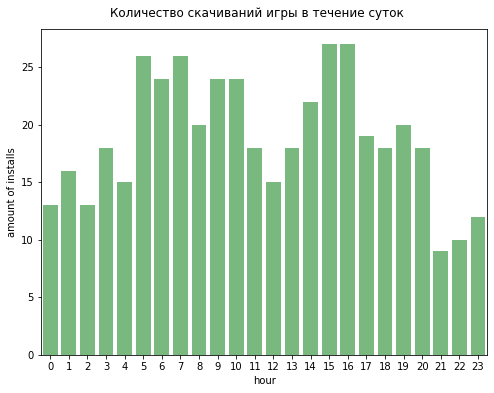

In [71]:
# построение графика количества скачиваний игры в течение суток
plt.figure(figsize=(8, 6))
sns.countplot(data=install, x='hour', color='xkcd:soft green')
plt.suptitle('Количество скачиваний игры в течение суток', x=0.5, y=0.93)
plt.ylabel('amount of installs')

На графике количества скачиваний выделяется 3 максимума: 
- в 15-16 часов (люди отдыхают на работе/учёбе/дома)
- в 5, 7 часов (скачивания по пути на работу/учебу)
- в 9-10 часов (скачивания по пути на работу/учебу)

Минимум скачиваний наблюдается в 21 час (потенциальные пользователи готовятся ко сну).

### Анализ пользователей, прошедших обучение

In [72]:
# отбор части датафрейма, фиксирующей обучение пользователей
learned_users = data.query('event_name == "learning"')

In [73]:
learned_users['event_data'] = learned_users['event_data'].apply(literal_eval)

In [74]:
# распаковка столбца event_data в отдельный датафрейм
learn_data = pd.json_normalize(data = learned_users['event_data'], 
                            meta =['name', 'level'])

In [75]:
learn_data

,name,level
0,CRUISE_USE_BOOSTERS_MORE,82
1,CRUISE_USE_BOOSTERS_MORE,192
2,CRUISE_USE_BOOSTERS_MORE,82
3,CRUISE_USE_BOOSTERS_MORE,82
4,CRUISE_USE_BOOSTERS_MORE,194
...,...,...
83867,CRUISE_USE_BOOSTERS_MORE,189
83868,CRUISE_USE_BOOSTERS_MORE,80
83869,CRUISE_USE_BOOSTERS_MORE,190
83870,CRUISE_USE_BOOSTERS_MORE,81


Распаковка json-формата прошла успешно.

In [76]:
learned_users = learned_users.drop('index', axis=1)

In [77]:
# перевод индексов строк в отдельную колонку (для объединения датафреймов по этому столбцу)
learn_data.reset_index(level=0, inplace=True)
learned_users.reset_index(level=0, inplace=True)

In [78]:
learned_users = learned_users.drop('index', axis=1)

In [79]:
learned_users.reset_index(level=0, inplace=True)

In [80]:
# объединение датафреймов learned_users и learn_data (по столбцу index)
learn = learned_users.merge(learn_data, on='index')

In [81]:
# удаление столбца event_data (т.к. эти данные уже содержатся в датафрейме)
learn = learn.drop('event_data', axis=1)

In [82]:
learn

,index,user_id,media_source,client_time,session_index,event_name,coins,freeRounds,freeUndo,freeWildCard,...,level_x,map,bet,gladeId,league,VIPPointsAmount,VIPStatus,gameType,name,level_y
0,0,60bb736b12667e6a8d107774,organic,2021-06-10 09:47:19,17,learning,37435,0,1,2,...,150,1,1.0,6.0,1.0,NaN,NaN,0.0,CRUISE_USE_BOOSTERS_MORE,82
1,1,60bba5ea7c80da6a9442cbf3,ad-traffic,2021-06-10 09:47:34,156,learning,148586,0,0,0,...,280,2,3.0,13.0,1.0,NaN,NaN,0.0,CRUISE_USE_BOOSTERS_MORE,192
2,2,60bb736b12667e6a8d107774,organic,2021-06-10 09:48:17,17,learning,35022,0,1,2,...,151,1,1.0,6.0,1.0,NaN,NaN,0.0,CRUISE_USE_BOOSTERS_MORE,82
3,3,60bb736b12667e6a8d107774,organic,2021-06-10 09:49:21,17,learning,32377,0,1,2,...,152,1,1.0,6.0,1.0,NaN,NaN,0.0,CRUISE_USE_BOOSTERS_MORE,82
4,4,60bba5ea7c80da6a9442cbf3,ad-traffic,2021-06-10 09:50:09,156,learning,150099,0,1,0,...,282,2,3.0,14.0,1.0,NaN,NaN,0.0,CRUISE_USE_BOOSTERS_MORE,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83867,83867,60bba5ea7c80da6a9442cbf3,ad-traffic,2021-06-10 09:43:54,156,learning,176302,0,0,0,...,276,2,3.0,13.0,1.0,NaN,NaN,0.0,CRUISE_USE_BOOSTERS_MORE,189
83868,83868,60bb736b12667e6a8d107774,organic,2021-06-10 09:44:25,17,learning,38668,0,1,3,...,148,1,1.0,6.0,1.0,NaN,NaN,0.0,CRUISE_USE_BOOSTERS_MORE,80
83869,83869,60bba5ea7c80da6a9442cbf3,ad-traffic,2021-06-10 09:45:28,156,learning,165185,0,0,0,...,278,2,3.0,13.0,1.0,NaN,NaN,0.0,CRUISE_USE_BOOSTERS_MORE,190
83870,83870,60bb736b12667e6a8d107774,organic,2021-06-10 09:45:38,17,learning,36571,0,1,3,...,149,1,1.0,6.0,1.0,NaN,NaN,0.0,CRUISE_USE_BOOSTERS_MORE,81


Объединение датафреймов learned_users и learn_data произошло успешно. Данные готовы к анализу.

In [83]:
# сохранение датафрейма learn в csv-файл (для построения визуализаций на основе этих данных)
learn.to_csv('learn_data.csv')

In [84]:
# подсчет количества подсказок, использованных на каком-либо уровне
learn.groupby('level_y', as_index=False) \
    .agg({'user_id':'count'}) \
    .sort_values(by='user_id', ascending=False) \
    .rename(columns={'level_y':'level', 'user_id':'amount_of_tips'})

,level,amount_of_tips
1,2,3190
13,14,2798
6,7,2561
4,5,2545
12,13,2503
...,...,...
330,356,1
325,349,1
324,347,1
323,346,1


In [85]:
# аналогично, но сортировка по уровням
level_tips = learn.groupby('level_y', as_index=False) \
    .agg({'user_id':'count'}) \
    .sort_values(by='level_y') \
    .rename(columns={'level_y':'level','user_id':'amount_of_tips'})

In [86]:
level_tips

,level,amount_of_tips
0,1,2363
1,2,3190
2,3,2026
3,4,2430
4,5,2545
...,...,...
402,488,2
403,490,2
404,491,1
405,493,3


([], [])

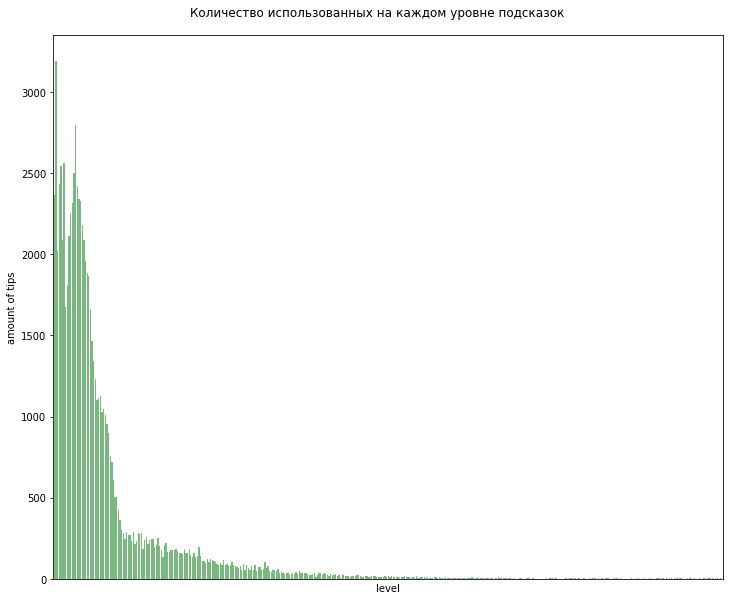

In [87]:
plt.figure(figsize=(12, 10))
sns.countplot(data=learn, x='level_y', color='xkcd:soft green')
plt.suptitle('Количество использованных на каждом уровне подсказок', y=0.92)
plt.xlabel('level')
plt.ylabel('amount of tips')
plt.xticks([])

Туториальные подсказки гораздо чаще используются на начальных уровнях игры, что вполне логично, поскольку:
- обучение пользователей происходит именно на начальных этапах игры
- на начальных этапах игры пользователи, как правило, еще не обладают достаточным опытом для игры без подсказок

In [88]:
# подсчет количества туториальных подсказок, использованных каждым игроком 
user_id_tips = learn.groupby('user_id', as_index=False) \
    .agg({'media_source':'count'}) \
    .sort_values(by='media_source', ascending=False) \
    .rename(columns={'media_source':'amount_of_tips'})

In [89]:
user_id_tips

,user_id,amount_of_tips
265,60bb8a867c80da6a9442cbe7,1128
101,60bb18f173c31e6a292b7a5c,1116
413,60bbfcbd7c80da6a9442cc1c,878
241,60bb7b8273c31e6a292b7a94,853
96,60bb11f812667e6a8d10774d,798
...,...,...
56,60baf54612667e6a8d10773f,2
284,60bb98044770af6a2faa05b8,2
200,60bb5acf7c80da6a9442cbd4,2
226,60bb724712667e6a8d107773,2


In [90]:
# выбор игроков, которые воспользовались максимальным числом подказок 
user_id_tips.query('amount_of_tips > amount_of_tips.quantile(0.95)') \
    .sort_values(by='amount_of_tips').user_id.tolist()

['60bb1a304770af6a2faa0575',
 '60bb857d7c80da6a9442cbe1',
 '60bac91d7c80da6a9442cb88',
 '60bb7ce14770af6a2faa05a9',
 '60bad8307c80da6a9442cb91',
 '60bb27ab73c31e6a292b7a67',
 '60baf0124770af6a2faa0567',
 '60bbab8712667e6a8d107794',
 '60bb41014770af6a2faa058e',
 '60bbbf587c80da6a9442cbfd',
 '60bac9e07c80da6a9442cb89',
 '60bbe09f4770af6a2faa05e1',
 '60bb9ea24770af6a2faa05bc',
 '60bb63eb12667e6a8d10776e',
 '60bb0e3c7c80da6a9442cba8',
 '60bb513d4770af6a2faa0593',
 '60bbcd294770af6a2faa05d5',
 '60bb11f812667e6a8d10774d',
 '60bb7b8273c31e6a292b7a94',
 '60bbfcbd7c80da6a9442cc1c',
 '60bb18f173c31e6a292b7a5c',
 '60bb8a867c80da6a9442cbe7']

In [91]:
user_id_tips.amount_of_tips.quantile(0.95)

549.0

Игроки, список которых приведен выше, воспользовались максимальным числом туториальных подсказок (более 549, т.е. более 95-го процентиля). В качестве граничного значения выбран 95-й процентиль, поскольку это значение позволяет отобрать только самых преданных игре пользователей.

In [92]:
# подсчет количества подсказок, использованных пользователями, пришедшими из определенного источника 
source_tips = learn.groupby(['media_source', 'user_id'], as_index=False) \
    .agg({'index':'count'}) \
    .sort_values(by='index', ascending=False) \
    .rename(columns={'index':'amount_of_tips'})

In [93]:
source_tips

,media_source,user_id,amount_of_tips
326,organic,60bb8a867c80da6a9442cbe7,1128
37,ad-traffic,60bb18f173c31e6a292b7a5c,1116
153,ad-traffic,60bbfcbd7c80da6a9442cc1c,878
308,organic,60bb7b8273c31e6a292b7a94,853
220,organic,60bb11f812667e6a8d10774d,798
...,...,...,...
378,organic,60bbbfe873c31e6a292b7abe,2
277,organic,60bb5acf7c80da6a9442cbd4,2
197,organic,60baf54612667e6a8d10773f,2
338,organic,60bb98044770af6a2faa05b8,2


In [94]:
# подсчет количества пользователей, пришедших по рекламе, и сохранение этого значения в переменную advert_learn_users
advert_learn_users = source_tips.query('media_source =="ad-traffic"') \
    .agg({'user_id':'count'}).iloc[0]

In [95]:
advert_learn_users 

159

In [96]:
# вычисление доли пользователей, пришедших по рекламе
part_advert_learn_users = round(advert_learn_users / amount_of_learned_users * 100, 2)

In [97]:
part_advert_learn_users

35.65

Среди пользователей, дошедших до обучения, доля пользователей, пришедших по рекламе, составляет 35.65%.
Для сравнения: 35.18% пользователей, установивших приложение, пришло по рекламе.  
Вывод: ожидания пользователей от игры при прохождении обучения оправдываются, т.к. количество перешедших по рекламе пользователей не меняется.

In [98]:
# создание столбцов, содержащих порядковый номер месяца и дня недели, день и час
learn['month'] = learn['client_time'].dt.month 
learn['day_of_the_week'] = learn['client_time'].dt.weekday + 1
learn['day'] = learn['client_time'].dt.day
learn['hour'] = learn['client_time'].dt.hour

In [99]:
learn.head()

,index,user_id,media_source,client_time,session_index,event_name,coins,freeRounds,freeUndo,freeWildCard,...,league,VIPPointsAmount,VIPStatus,gameType,name,level_y,month,day_of_the_week,day,hour
0,0,60bb736b12667e6a8d107774,organic,2021-06-10 09:47:19,17,learning,37435,0,1,2,...,1.0,NaN,NaN,0.0,CRUISE_USE_BOOSTERS_MORE,82,6,4,10,9
1,1,60bba5ea7c80da6a9442cbf3,ad-traffic,2021-06-10 09:47:34,156,learning,148586,0,0,0,...,1.0,NaN,NaN,0.0,CRUISE_USE_BOOSTERS_MORE,192,6,4,10,9
2,2,60bb736b12667e6a8d107774,organic,2021-06-10 09:48:17,17,learning,35022,0,1,2,...,1.0,NaN,NaN,0.0,CRUISE_USE_BOOSTERS_MORE,82,6,4,10,9
3,3,60bb736b12667e6a8d107774,organic,2021-06-10 09:49:21,17,learning,32377,0,1,2,...,1.0,NaN,NaN,0.0,CRUISE_USE_BOOSTERS_MORE,82,6,4,10,9
4,4,60bba5ea7c80da6a9442cbf3,ad-traffic,2021-06-10 09:50:09,156,learning,150099,0,1,0,...,1.0,NaN,NaN,0.0,CRUISE_USE_BOOSTERS_MORE,194,6,4,10,9


Создание столбцов прошло успешно.

In [100]:
# поиск уникальных значений порядкового номера месяца
learn['month'].unique()

array([6], dtype=int64)

В исходнике представлены данные лишь за июнь, поэтому никаких выводов о наличии/отсутствии сезонности сделать нельзя

In [101]:
# поиск уникальных значений порядкового номера дня недели
learn['day_of_the_week'].unique()

array([4, 5, 6, 7, 1, 2, 3], dtype=int64)

In [102]:
# подсчет количества использованных туториальных подсказок, сгруппированных по дням недели
day_of_the_week_tips = learn.groupby('day_of_the_week', as_index=False) \
    .agg({'user_id':'count'}) \
    .sort_values(by='user_id', ascending=False) \
    .rename(columns={'user_id':'amount_of_tips'})

In [103]:
day_of_the_week_tips

,day_of_the_week,amount_of_tips
5,6,58545
6,7,10035
0,1,4336
1,2,3649
2,3,3041
4,5,2228
3,4,2038


Максимальное число туториальных подсказок было использовано игроками в субботу.  

Выводы: 
- максимальная пользовательская активность наблюдается в субботу, что, вероятно, объясняется тем фактом, что люди в выходные располагают большим количеством времени для игр
- все скачивания игры приходятся на субботу => вероятно, пользователи начинали обучение сразу после скачивания игры

In [104]:
# поиск уникальных значений дня
learn['day'].unique()

array([10, 11, 12,  5,  6,  7,  8,  9], dtype=int64)

In [105]:
# подсчет количества использованных туториальных подсказок, сгруппированных по дням
day_tips = learn.groupby('day', as_index=False) \
    .agg({'user_id':'count'}) \
    .sort_values(by='user_id', ascending=False) \
    .rename(columns={'user_id':'amount_of_tips'})

In [106]:
day_tips

,day,amount_of_tips
0,5,56189
1,6,10035
2,7,4336
3,8,3649
4,9,3041
7,12,2356
6,11,2228
5,10,2038


Максимальное число туториальных подсказок было использовано 5 июня - в день, когда игра была скачана всеми игроками. Эти данные подтверждают гипотезу о том, что пользователи, как правило, проходили обучение непосредственно после установки игры.
Со временем число использованных туториальных подсказок уменьшалось, что позволяет судить о снижении пользовательской активности (retention).

In [107]:
# поиск уникальных значений часа
learn['hour'].unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,
        2,  3,  4,  5,  6,  7,  8], dtype=int64)

In [108]:
# подсчет количества использованных туториальных подсказок, сгруппированных по часам
hour_tips = learn.groupby('hour', as_index=False) \
    .agg({'user_id':'count'}) \
    .sort_values(by='user_id', ascending=False) \
    .rename(columns={'user_id':'amount_of_tips'})

In [109]:
hour_tips

,hour,amount_of_tips
19,19,5252
15,15,5191
16,16,5008
10,10,4638
17,17,4569
8,8,4528
9,9,4386
14,14,4045
20,20,3915
7,7,3905


Text(0, 0.5, 'amount of tips')

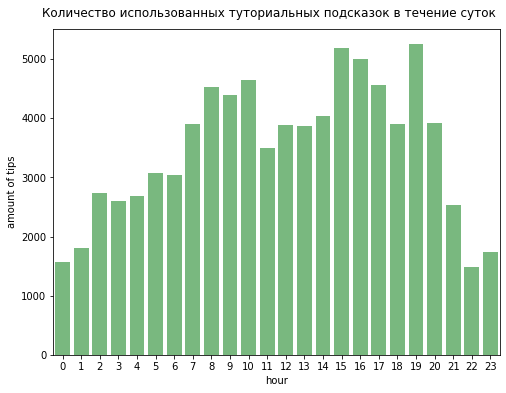

In [110]:
# построение графика использования туториальных подсказок в течение суток
plt.figure(figsize=(8, 6))
sns.countplot(data=learn, x='hour', color='xkcd:soft green')
plt.suptitle('Количество использованных туториальных подсказок в течение суток', x=0.5, y=0.93)
plt.ylabel('amount of tips')

На графике количества использованных подсказок выделяется несколько максимумов:
- в 19 часов (к вечеру пользователи завершают свои дела и отдыхают за игрой)
- в 15-16 часов (пользователи проводят время за игрой после обеда)
- 8-10 утра (... по дороге куда-либо) 

Минимум количества использованных подсказок наблюдается в период с 22 до 1 часа, поскольку в это время пользователи готовятся ко сну/спят.

In [111]:
# отбор колонок, необходимых для построения корреляционной матрицы
# корреляция между уровнем показа туториальной подсказки и количеством монет
learn_corr = learn[['coins', 'level_y']]

<AxesSubplot:>

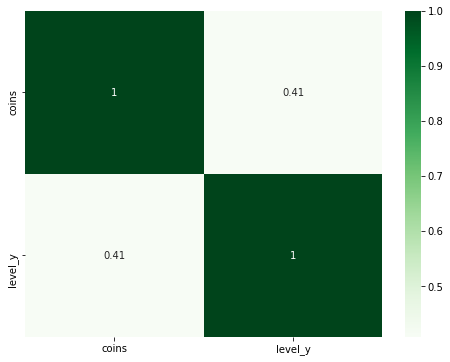

In [112]:
# построение корреляционной матрицы
plt.figure(figsize=(8, 6))
sns.heatmap(learn_corr.corr(), cmap='Greens', annot=True)

Корреляция между уровнем показа туториальной подсказки (уровнем игрока) и количеством монет слабая, связь положительная (чем больше монет, тем выше уровень, и наоборот).

### Анализ пользователей, перешедших к прохождению уровней

In [113]:
# отбор части датафрейма, фиксирующей прохождение грядок 
completed_users = data.query('event_name == "gladeComplete"')

In [114]:
complete_data = completed_users['event_data'].apply(json.loads)

In [115]:
# распаковка столбца event_data в отдельный датафрейм
complete_data = pd.json_normalize(data = complete_data, 
                          meta=['levels'])

Распаковка столбца с данными в формате json прошла успешно.

In [116]:
completed_users = completed_users.drop(['index'], axis=1)

In [117]:
# перевод индексов строк в отдельную колонку (для объединения датафреймов по этому столбцу)
complete_data.reset_index(level=0, inplace=True)
completed_users.reset_index(level=0, inplace=True)

In [118]:
completed_users = completed_users.drop('index', axis=1)

In [119]:
completed_users.reset_index(level=0, inplace=True)

In [120]:
# объединение датафреймов completed_users и complete_data (по столбцу index)
complete = completed_users.merge(complete_data, on='index')

In [121]:
# удаление столбца event_data (т.к. эти данные уже содержатся в датафрейме)
complete = complete.drop('event_data', axis=1)

In [122]:
complete

,index,user_id,media_source,client_time,session_index,event_name,coins,freeRounds,freeUndo,freeWildCard,freeAddCards,level,map,bet,gladeId,league,VIPPointsAmount,VIPStatus,gameType,levels
0,0,60bb1bac12667e6a8d10774e,organic,2021-06-09 02:58:06,52,gladeComplete,6041,0,2,0,0,197,1,1.0,7.0,1.0,0.0,0.0,NaN,63
1,1,60bb1bac12667e6a8d10774e,organic,2021-06-10 13:38:07,63,gladeComplete,6050,0,1,0,0,237,1,1.0,8.0,1.0,0.0,0.0,NaN,39
2,2,60bb66084770af6a2faa05a0,organic,2021-06-10 20:07:37,13,gladeComplete,8873,0,0,3,0,108,1,2.0,6.0,0.0,NaN,NaN,NaN,10
3,3,60bb7de34770af6a2faa05ab,ad-traffic,2021-06-11 00:53:38,5,gladeComplete,17154,0,0,2,0,68,1,3.0,4.0,0.0,0.0,0.0,NaN,6
4,4,60bb46a573c31e6a292b7a79,ad-traffic,2021-06-11 11:06:29,58,gladeComplete,7846,0,0,0,0,173,1,1.0,7.0,0.0,NaN,NaN,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,1450,60bb482f73c31e6a292b7a7b,ad-traffic,2021-06-11 09:52:59,4,gladeComplete,16341,0,17,0,2,158,1,3.0,9.0,1.0,NaN,NaN,NaN,14
1451,1451,60bb74e973c31e6a292b7a8f,ad-traffic,2021-06-11 11:05:23,21,gladeComplete,5239,0,0,0,0,202,1,1.0,8.0,1.0,0.0,0.0,NaN,38
1452,1452,60bb44b373c31e6a292b7a77,organic,2021-06-11 11:51:38,5,gladeComplete,55660,0,8,0,0,152,1,2.0,8.0,1.0,0.0,0.0,NaN,22
1453,1453,60bad8307c80da6a9442cb91,organic,2021-06-07 21:34:46,32,gladeComplete,6236,0,0,0,0,193,1,1.0,6.0,0.0,0.0,0.0,NaN,59


In [123]:
# сохранение датафрейма complete в csv-файл (для построения визуализаций на основе этих данных)
complete.to_csv('complete.csv')

Объединение датафреймов completed_users и complete_data прошло успешно, данные не были потеряны (1455 записей содержится как в исходных датафреймах, так и в конечном).

In [124]:
# подсчет количества грядок, пройденных пользователями, пришедшими из определенного источника 
source_glades = learn.groupby(['media_source', 'user_id'], as_index=False) \
    .agg({'index':'count'}) \
    .sort_values(by='index', ascending=False) \
    .rename(columns={'index':'amount_of_glades'})

In [125]:
source_glades

,media_source,user_id,amount_of_glades
326,organic,60bb8a867c80da6a9442cbe7,1128
37,ad-traffic,60bb18f173c31e6a292b7a5c,1116
153,ad-traffic,60bbfcbd7c80da6a9442cc1c,878
308,organic,60bb7b8273c31e6a292b7a94,853
220,organic,60bb11f812667e6a8d10774d,798
...,...,...,...
378,organic,60bbbfe873c31e6a292b7abe,2
277,organic,60bb5acf7c80da6a9442cbd4,2
197,organic,60baf54612667e6a8d10773f,2
338,organic,60bb98044770af6a2faa05b8,2


In [126]:
# подсчет количества пользователей, пришедших по рекламе, и сохранение этого значения в переменную advert_complete_users
advert_complete_users = source_glades.query('media_source =="ad-traffic"') \
    .agg({'user_id':'count'}).iloc[0]

In [127]:
advert_complete_users

159

In [128]:
# вычисление доли пользователей, пришедших по рекламе
part_advert_complete_users = round(advert_complete_users / amount_of_completed_users * 100, 2)

In [129]:
part_advert_complete_users

54.45

Среди пользователей, прошедших хотя бы 1 грядку, доля пользователей, пришедших по рекламе, составляет 54.45%
Для сравнения: 35.65% пользователей, установивших приложение, пришло по рекламе.  
Вывод: ожидания пользователей, перешедших без рекламы, оправдываются в меньшей степени, чем ожидания пользователей, перешедших по рекламе (т.к. доля пользователей, пришедших без рекламы, значительно сокращается).
Пользователи, пришедшие по рекламе, не уходят.

In [130]:
# создание столбцов, содержащих порядковый номер месяца и дня недели, день и час
complete['month'] = complete['client_time'].dt.month 
complete['day_of_the_week'] = complete['client_time'].dt.weekday + 1
complete['day'] = complete['client_time'].dt.day
complete['hour'] = complete['client_time'].dt.hour

In [131]:
complete.head()

,index,user_id,media_source,client_time,session_index,event_name,coins,freeRounds,freeUndo,freeWildCard,...,gladeId,league,VIPPointsAmount,VIPStatus,gameType,levels,month,day_of_the_week,day,hour
0,0,60bb1bac12667e6a8d10774e,organic,2021-06-09 02:58:06,52,gladeComplete,6041,0,2,0,...,7.0,1.0,0.0,0.0,NaN,63,6,3,9,2
1,1,60bb1bac12667e6a8d10774e,organic,2021-06-10 13:38:07,63,gladeComplete,6050,0,1,0,...,8.0,1.0,0.0,0.0,NaN,39,6,4,10,13
2,2,60bb66084770af6a2faa05a0,organic,2021-06-10 20:07:37,13,gladeComplete,8873,0,0,3,...,6.0,0.0,NaN,NaN,NaN,10,6,4,10,20
3,3,60bb7de34770af6a2faa05ab,ad-traffic,2021-06-11 00:53:38,5,gladeComplete,17154,0,0,2,...,4.0,0.0,0.0,0.0,NaN,6,6,5,11,0
4,4,60bb46a573c31e6a292b7a79,ad-traffic,2021-06-11 11:06:29,58,gladeComplete,7846,0,0,0,...,7.0,0.0,NaN,NaN,NaN,41,6,5,11,11


Создание столбцов прошло успешно.

In [132]:
# поиск уникальных значений порядкового номера месяца
complete['month'].unique()

array([6], dtype=int64)

В исходнике представлены данные лишь за июнь, поэтому никаких выводов о наличии/отсутствии сезонности сделать нельзя.

In [133]:
# поиск уникальных значений порядкового номера дня недели
complete['day_of_the_week'].unique()

array([3, 4, 5, 6, 7, 1, 2], dtype=int64)

In [134]:
# подсчет количества завершенных грядок, сгруппированных по дням недели
day_of_the_week_glades = learn.groupby('day_of_the_week', as_index=False) \
    .agg({'user_id':'count'}) \
    .sort_values(by='user_id', ascending=False) \
    .rename(columns={'user_id':'amount_of_glades'})

In [135]:
day_of_the_week_glades

,day_of_the_week,amount_of_glades
5,6,58545
6,7,10035
0,1,4336
1,2,3649
2,3,3041
4,5,2228
3,4,2038


Максимальное число грядок было завершено игроками в субботу.  

Выводы : 
- максимальная пользовательская активность наблюдается в субботу, что, вероятно, объясняется тем фактом, что люди в выходные располагают большим количеством времени для игр
- все скачивания игры приходятся на субботу => вероятно пользователи начинали прохождение игры сразу после скачивания и обучения

In [136]:
# поиск уникальных значений дня
complete['day'].unique()

array([ 9, 10, 11, 12,  5,  6,  7,  8], dtype=int64)

In [137]:
# подсчет количества завершенных грядок, сгруппированных по дням
day_glades = learn.groupby('day', as_index=False) \
    .agg({'user_id':'count'}) \
    .sort_values(by='user_id', ascending=False) \
    .rename(columns={'user_id':'amount_of_glades'})

In [138]:
day_glades

,day,amount_of_glades
0,5,56189
1,6,10035
2,7,4336
3,8,3649
4,9,3041
7,12,2356
6,11,2228
5,10,2038


Максимальное число грядок было завершено 5 июня - в день, когда игра была скачана всеми игроками. Эти данные подтверждают гипотезу о том, что пользователи, как правило, начинали прохождение игры непосредственно после обучения.
Со временем число завершенных грядок уменьшалось, что позволило судить о снижении пользовательской активности (retention).

In [139]:
# поиск уникальных значений часа
complete['hour'].unique()

array([ 2, 13, 20,  0, 11, 12, 14, 15, 17, 18, 19, 21, 22, 23,  3,  4,  5,
        6,  7,  8,  9, 10, 16,  1], dtype=int64)

In [140]:
# подсчет количества завершенных грядок, сгруппированных по часам
hour_glades = learn.groupby('hour', as_index=False) \
    .agg({'user_id':'count'}) \
    .sort_values(by='user_id', ascending=False) \
    .rename(columns={'user_id':'amount_of_glades'})

In [141]:
hour_glades

,hour,amount_of_glades
19,19,5252
15,15,5191
16,16,5008
10,10,4638
17,17,4569
8,8,4528
9,9,4386
14,14,4045
20,20,3915
7,7,3905


Text(0, 0.5, 'amount of glades')

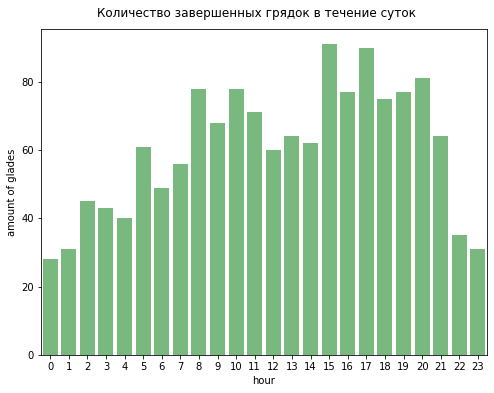

In [142]:
# построение графика завершения грядок в течение суток
plt.figure(figsize=(8, 6))
sns.countplot(data=complete, x='hour', color='xkcd:soft green')
plt.suptitle('Количество завершенных грядок в течение суток', x=0.5, y=0.93)
plt.ylabel('amount of glades')

На графике количества завершенных грядок выделяется максимум в 15, 17 часов, который свидетельствует о том, что пользователи начинали проходить игру (завершать грядки) непосредственно после установки игры и прохождения обучения (максимумы количества завершенных грядок коррелируют с максимумами количества установок и использованных туториальных подсказок).

## Задание 1.2. Качество контента

Изучите то, как пользователи взаимодействуют с игровыми уровнями.  
Оцените качество первых 30 уровней игры: какие уровни хороши, какие нет и почему?

In [143]:
# отбор части датафрейма, фиксирующей прохождение уровней 
played_users = data.query('event_name == "levelEnd"')

In [144]:
play_data = played_users['event_data'].apply(json.loads)

In [145]:
# распаковка столбца event_data в отдельный датафрейм
play_data = pd.json_normalize(data = play_data, 
                          meta=['time', 'level', 'levelLoop', 'win', 'stars', 'cardsOnField', 'cardsOnHand'])

Распаковка столбца с данными в формате json прошла успешно.

In [146]:
played_users = played_users.drop(['index'], axis=1)

In [147]:
# перевод индексов строк в отдельную колонку (для объединения датафреймов по этому столбцу)
play_data.reset_index(level=0, inplace=True)
played_users.reset_index(level=0, inplace=True)

In [148]:
played_users = played_users.drop('index', axis=1)

In [149]:
played_users.reset_index(level=0, inplace=True)

In [150]:
# объединение датафреймов played_users и play_data (по столбцу index)
play = played_users.merge(play_data, on='index')

In [151]:
# удаление столбца event_data (т.к. эти данные уже содержатся в датафрейме)
play = play.drop('event_data', axis=1)

In [152]:
play

,index,user_id,media_source,client_time,session_index,event_name,coins,freeRounds,freeUndo,freeWildCard,...,stars,streaksRewards,cardsOnField,cardsOnHands,baseLuckyIndex,targetGoldIndex,totalLuckyIndex,cardsRemainsBonus,prediction,predictionCameTrue
0,0,60babef87c80da6a9442cb86,ad-traffic,2021-06-05 00:02:40,1,levelEnd,5000,0,3,3,...,5,"[Gold, AdditionalCard, WildCard, Gold, Additio...",0,17,0,0,0,1580,Default,False
1,1,60babef87c80da6a9442cb86,ad-traffic,2021-06-05 00:03:39,1,levelEnd,9288,0,3,3,...,3,"[Gold, AdditionalCard, WildCard]",0,3,0,0,0,90,VictoryWith1Or2Cards,True
2,2,60babef87c80da6a9442cb86,ad-traffic,2021-06-05 00:04:37,1,levelEnd,12602,1,3,2,...,2,"[Gold, AdditionalCard]",0,5,0,0,0,150,VictoryWith4OrMoreCards,True
3,3,60bac0e912667e6a8d107731,ad-traffic,2021-06-05 00:04:59,1,levelEnd,5000,0,3,3,...,5,"[Gold, AdditionalCard, WildCard, Gold, Additio...",0,17,0,0,0,1620,Default,False
4,4,60babfb17c80da6a9442cb87,organic,2021-06-05 00:05:48,1,levelEnd,5000,0,3,3,...,5,"[Gold, AdditionalCard, WildCard, Gold, Additio...",0,17,0,0,0,1660,Default,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39004,39004,60bb990973c31e6a292b7aa2,ad-traffic,2021-06-12 23:47:04,28,levelEnd,56806,0,12,0,...,6,"[Gold, AdditionalCard]",0,0,0,0,0,0,DefeatWith1Or2Cards,False
39005,39005,60bbbd9573c31e6a292b7abb,ad-traffic,2021-06-12 23:48:08,7,levelEnd,188280,0,7,10,...,2,"[Gold, AdditionalCard]",0,2,0,0,0,30,VictoryWith1Or2Cards,True
39006,39006,60bb990973c31e6a292b7aa2,ad-traffic,2021-06-12 23:48:52,28,levelEnd,25122,0,12,0,...,3,[Gold],0,0,0,0,0,0,DefeatWith5OrMoreCards,False
39007,39007,60bbbd9573c31e6a292b7abb,ad-traffic,2021-06-12 23:49:40,7,levelEnd,188905,0,7,10,...,4,"[Gold, AdditionalCard, WildCard, Gold]",0,1,0,0,0,10,VictoryWith1Or2Cards,True


Объединение датафреймов прошло успешно, данные не были потеряны (39009 записей содержится как в исходных датафреймах, так и в конечном).

In [153]:
# сохранение датафрейма play в csv-файл (для построения визуализаций на основе этих данных)
play.to_csv('play.csv')

In [154]:
# отбор записей, хранящих информацию только о уровнях с 1 по 30 (включительно)
start_levels = play.query('levelLoop <= 30')

In [155]:
# подсчет количества попыток прохождения того или иного уровня
start_levels.groupby('levelLoop', as_index=False) \
    .agg({'user_id':'count'}) \
    .sort_values(by='user_id', ascending=False) \
    .rename(columns={'user_id':'amount_of_players'})

,levelLoop,amount_of_players
0,0.0,12591
1,1.0,336
3,6.0,315
4,7.0,309
5,8.0,302
8,11.0,300
9,12.0,296
10,13.0,291
11,14.0,285
25,29.0,282


Максимальное число прохождений получил уровень 0.0, который, вероятно, является вводным.
Порядок уровней в игре не зафиксирован + игроки не могут выбирать уровень самостоятельно, поэтому никаких гипотез выдвинуть нельзя.

In [156]:
# просмотр сводных статистик времени прохождения уровней (до 30 уровня включительно)
start_levels.groupby('levelLoop') \
    .time.describe()

,count,mean,std,min,25%,50%,75%,max
levelLoop,,,,,,,,
0.0,12591.0,148279.771345,1.068100e+06,13750.0,65875.50,82513.0,103854.00,73327660.0
1.0,336.0,51789.764881,7.804156e+04,27003.0,31353.50,36395.5,44258.50,1054141.0
5.0,2.0,50147.500000,4.765193e+03,46778.0,48462.75,50147.5,51832.25,53517.0
6.0,315.0,136419.653968,8.347744e+05,8934.0,44951.00,56855.0,70960.00,13921844.0
7.0,309.0,54194.022654,2.944329e+04,19476.0,39144.00,48614.0,60782.00,407456.0
8.0,302.0,98549.165563,3.421635e+05,16596.0,53312.75,64211.5,82382.50,5392290.0
9.0,2.0,46237.000000,4.147888e+03,43304.0,44770.50,46237.0,47703.50,49170.0
10.0,2.0,54226.500000,1.273994e+04,45218.0,49722.25,54226.5,58730.75,63235.0
11.0,300.0,76381.703333,5.576111e+04,35280.0,53365.25,66154.0,81409.50,707959.0


Выделяются большие медианные значения времени прохождения 19, 20 уровней.

In [157]:
# подсчет количества игроков, прошедших определенное количество уровней
levels_plays_count = start_levels.groupby('level_y', as_index=False) \
    .agg({'user_id':'count'}) \
    .sort_values(by='user_id', ascending=False) \
    .rename(columns={'user_id':'amount_of_plays', 'level_y':'amount_of_levels'})

In [158]:
levels_plays_count

,amount_of_levels,amount_of_plays
0,1,437
1,2,420
2,3,407
3,4,406
7,8,406
...,...,...
345,371,1
346,372,1
347,373,1
348,374,1


## Поиск неудачных уровней

In [159]:
levels_plays_count.amount_of_plays.tolist()

[437,
 420,
 407,
 406,
 406,
 403,
 401,
 393,
 392,
 386,
 336,
 246,
 141,
 126,
 113,
 91,
 90,
 89,
 89,
 87,
 86,
 86,
 85,
 85,
 84,
 83,
 82,
 82,
 82,
 80,
 80,
 78,
 77,
 77,
 76,
 76,
 76,
 75,
 75,
 75,
 75,
 75,
 75,
 74,
 74,
 74,
 74,
 74,
 74,
 73,
 73,
 73,
 72,
 72,
 71,
 71,
 71,
 71,
 70,
 70,
 69,
 69,
 68,
 68,
 67,
 67,
 66,
 66,
 66,
 66,
 65,
 65,
 65,
 64,
 64,
 64,
 64,
 63,
 63,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 61,
 61,
 61,
 61,
 61,
 61,
 60,
 60,
 60,
 60,
 59,
 59,
 58,
 58,
 57,
 57,
 57,
 57,
 56,
 55,
 54,
 54,
 54,
 54,
 53,
 52,
 51,
 51,
 51,
 50,
 50,
 50,
 48,
 48,
 48,
 48,
 47,
 47,
 47,
 45,
 45,
 45,
 44,
 44,
 44,
 43,
 43,
 43,
 42,
 41,
 41,
 40,
 40,
 38,
 38,
 38,
 38,
 38,
 37,
 36,
 36,
 35,
 35,
 35,
 35,
 34,
 34,
 34,
 32,
 32,
 32,
 32,
 32,
 31,
 31,
 30,
 30,
 30,
 30,
 29,
 29,
 29,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 26,
 26,
 26,
 26,
 25,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,


([], [])

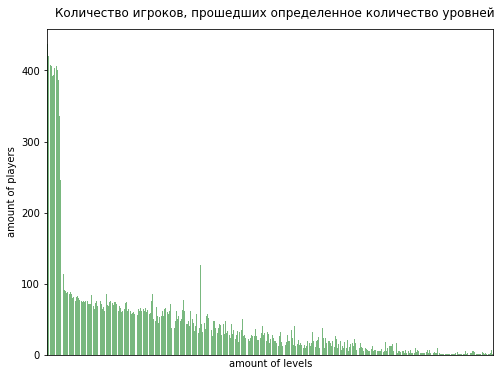

In [160]:
# построение графика количества игроков, прошедших определенное количество уровней
plt.figure(figsize=(8, 6))
sns.countplot(data=start_levels, x='level_y', color='xkcd:soft green')
plt.suptitle('Количество игроков, прошедших определенное количество уровней', x=0.52, y=0.93)
plt.ylabel('amount of players')
plt.xlabel('amount of levels')
plt.xticks([])

Количество игроков, прошедших определенное количество уровней, резко падает дважды: с 336 до 246 и с 246 до 141

In [161]:
# отбор порядкового номера уровня, до и после которого количество игроков стремительно падает
levels_plays_count.query('amount_of_plays == 246')

,amount_of_levels,amount_of_plays
11,12,246


После прохождения 11/12 уровней заметная доля пользователей перестаёт играть. 

In [162]:
# отбор уровней, после которых значительная доля пользователей перестает играть
start_levels.query('level_y == 11').levelLoop.unique().tolist()

[29.0, 30.0, 17.0, 0.0, 18.0, 14.0, 19.0, 20.0]

In [163]:
start_levels.query('level_y == 12').levelLoop.unique().tolist()

[29.0, 0.0, 30.0, 18.0, 15.0, 19.0, 20.0, 21.0, 12.0]

После взаимодействия с уровнями 30, 29, 20, 19, 18, 0 пользователи перестают играть => вероятно, с этими уровнями что-то не так.

### Уровень 30

In [164]:
# смена настроек отображения чисел с плавающей точкой в pandas
pd.options.display.float_format = '{:.2f}'.format

In [165]:
# подсчет количества пользователей, (не)прошедших уровень 30
win_level_30 = start_levels.query('levelLoop == 30') \
    .groupby(['win', 'stars'], as_index=False) \
    .agg({'user_id':'count'}) \
    .rename(columns={'user_id':'amount_of_users'})

In [166]:
win_level_30

,win,stars,amount_of_users
0,DEFEAT,0,3
1,DEFEAT_WITH_BOOSTER,0,1
2,VICTORY,1,15
3,VICTORY,2,83
4,VICTORY,3,11
5,VICTORY,4,64
6,VICTORY,6,24
7,VICTORY,8,2
8,VICTORY,9,4
9,VICTORY_WITH_BOOSTER,1,6


In [167]:
# сохранение значений количества игроков, воспользовавшихся бустером, количества проигравших игроков 
# и количества всех игроков
level_30_booster = win_level_30.query('win == "VICTORY_WITH_BOOSTER"').amount_of_users.sum()
level_30_fail = win_level_30.query('(win == "DEFEAT_WITH_BOOSTER") | (win == "DEFEAT")').amount_of_users.sum()
level_30_all = win_level_30.amount_of_users.sum()

In [168]:
round(level_30_booster / level_30_all * 100, 2)

24.73

In [169]:
round(level_30_fail / level_30_all * 100, 2)

1.45

24,73% игроков воспользовалось бустером для прохождения данного уровня.
1.45% игроков завершило данный уровень поражением.

In [170]:
# просмотр описательных статистик времени прохождения данного уровня
# перевод времени в секунды
round(start_levels.query('levelLoop == 30') \
    .time.describe() / 1000, 2)

count      0.28
mean      84.34
std      248.07
min       28.58
25%       52.16
50%       63.61
75%       79.10
max     4146.70
Name: time, dtype: float64

Медианное время прохождения уровня - около 64 секунд - приемлемое значение (ориентировочное значение = 60 секунд).

In [171]:
# отбор всех игроков, (не)прошедших данный уровень
users_30 = start_levels.query('levelLoop == 30') \
    .user_id.unique().tolist()

In [172]:
# продолжили пользователи игру после прохождения 30-го уровня или нет
continued = 0
fail = 0
for i in users_30:
    work_state = start_levels[(start_levels.user_id == i) & (start_levels.levelLoop == 30)].level_y.tolist()
    max_state = start_levels[start_levels.user_id == i].level_y.max()
    if work_state < max_state:
        continued += 1
    else:
        fail += 1
        
print('Продолжили игру ' + str(continued) + ' игроков')
print('Прервали игру ' + str(fail) + ' игроков')

Продолжили игру 0 игроков
Прервали игру 275 игроков


Все игроки закончили прохождение игры после 30 уровня.

In [173]:
# сохранение значения количества игроков, закончивших прохождение 30 уровня, в переменную finish_30
finish_30 = start_levels.query('levelLoop == 30').shape[0]

In [174]:
# отбор части датафрейма, фиксирующей начало уровня
started_users = data.query('event_name == "levelStart"')

In [175]:
start_data = started_users['event_data'].apply(json.loads)

In [176]:
# распаковка столбца event_data в отдельный датафрейм
start_data = pd.json_normalize(data = start_data, 
                          meta=['level', 'levelLoop', 'price', 'cardsInHand'])

Распаковка столбца с данными в формате json прошла успешно.

In [177]:
started_users = started_users.drop(['index'], axis=1)

In [178]:
# перевод индексов строк в отдельную колонку (для объединения датафреймов по этому столбцу)
start_data.reset_index(level=0, inplace=True)
started_users.reset_index(level=0, inplace=True)

In [179]:
started_users = started_users.drop('index', axis=1)

In [180]:
started_users.reset_index(level=0, inplace=True)

In [181]:
# объединение датафреймов completed_users и complete_data (по столбцу index)
start = started_users.merge(start_data, on='index')

In [182]:
# удаление столбца event_data (т.к. эти данные уже содержатся в датафрейме)
start = start.drop('event_data', axis=1)

In [183]:
start

,index,user_id,media_source,client_time,session_index,event_name,coins,freeRounds,freeUndo,freeWildCard,...,levelLoop,gameType_y,VIPStatus_y,price,cardsInHand,baseLuckyIndex,targetGoldIndex,targetCoins,totalLuckyIndex,prediction
0,0,60c588d7b4d1b24b40531f29,organic,2021-06-05 10:31:56,6,levelStart,41670,0,4,0,...,0.00,0,0.00,2000,17,-3,-3,3350,-3,DefeatWith1Or2Cards
1,1,60c588d7b4d1b24b40531f29,organic,2021-06-05 10:33:23,6,levelStart,34070,0,4,0,...,0.00,0,0.00,2000,14,-3,-3,2650,-3,DefeatWith1Or2Cards
2,2,60c588d7b4d1b24b40531f29,organic,2021-06-05 10:34:46,6,levelStart,32750,0,2,0,...,0.00,0,0.00,2000,13,0,0,1950,0,DefeatWith1Or2Cards
3,3,60c588d7b4d1b24b40531f29,organic,2021-06-05 11:06:35,7,levelStart,32550,0,2,0,...,0.00,0,0.00,2000,12,0,0,1250,0,DefeatWith1Or2Cards
4,4,60c588d7b4d1b24b40531f29,organic,2021-06-05 11:07:51,7,levelStart,28005,0,2,0,...,0.00,0,0.00,2000,15,-3,-3,550,-3,DefeatWith1Or2Cards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39728,39728,60bb6f2c12667e6a8d107772,organic,2021-06-12 15:24:26,10,levelStart,53385,0,1,1,...,162.00,0,0.00,3500,23,0,0,0,0,DefeatWith1Or2Cards
39729,39729,60bb6f2c12667e6a8d107772,organic,2021-06-12 15:26:29,10,levelStart,55813,0,1,0,...,163.00,0,0.00,3500,23,0,0,0,0,DefeatWith1Or2Cards
39730,39730,60bb6f2c12667e6a8d107772,organic,2021-06-12 19:58:52,65,levelStart,9510,0,3,0,...,280.00,0,0.00,3500,16,0,0,0,0,DefeatWith3OrMoreCards
39731,39731,60bb6f2c12667e6a8d107772,organic,2021-06-12 20:00:17,65,levelStart,240,0,3,0,...,281.00,0,0.00,3500,21,0,0,0,0,DefeatWith1Or2Cards


Объединение датафреймов completed_users и complete_data прошло успешно.

In [184]:
# сохранение датафрейма start в csv-файл (для построения визуализаций на основе этих данных)
start.to_csv('start.csv')

In [185]:
# сохранение значения количества игроков, начавших прохождение 30 уровня, в переменную start_30
start_30 = start.query('levelLoop == 30').shape[0]

In [186]:
start_30

280

In [187]:
finish_30

275

In [188]:
# нахождение доли пользователей, прервавших прохождение уровня
round((start_30 - finish_30) / start_30 * 100, 2)

1.79

5 игроков (1.79%) прервали прохождение уровня

Уровень 30 является "плохим", т.к.:
- все игроки закончили прохождение игры после данного уровня  
Вероятно, этот уровень слишком сложный или непонятный / содержит ошибки или баги.

### Уровень 29

In [189]:
# подсчет количества пользователей, (не)прошедших уровень 29
win_level_29 = start_levels.query('levelLoop == 29') \
    .groupby(['win', 'stars'], as_index=False) \
    .agg({'user_id':'count'}) \
    .rename(columns={'user_id':'amount_of_users'})

In [190]:
win_level_29

,win,stars,amount_of_users
0,DEFEAT,0,10
1,DEFEAT_WITH_BOOSTER,0,1
2,VICTORY,0,1
3,VICTORY,1,11
4,VICTORY,2,52
5,VICTORY,3,7
6,VICTORY,4,37
7,VICTORY,6,5
8,VICTORY,12,1
9,VICTORY_WITH_BOOSTER,0,6


In [191]:
# сохранение значений количества игроков, воспользовавшихся бустером, количества проигравших игроков 
# и количества всех игроков
level_29_booster = win_level_29.query('win == "VICTORY_WITH_BOOSTER"').amount_of_users.sum()
level_29_fail = win_level_29.query('(win == "DEFEAT_WITH_BOOSTER") | (win == "DEFEAT")').amount_of_users.sum()
level_29_all = win_level_29.amount_of_users.sum()

In [192]:
round(level_29_booster / level_29_all * 100, 2)

55.67

In [193]:
round(level_29_fail / level_29_all * 100, 2)

3.9

55.67% игроков воспользовалось бустером для прохождения данного уровня. Для 3.9% игроков данный уровень закончился поражением.

In [194]:
# просмотр описательных статистик времени прохождения данного уровня
# перевод времени в секунды
round(start_levels.query('levelLoop == 29') \
    .time.describe() / 1000, 2)

count     0.28
mean     67.99
std      57.74
min      31.94
25%      49.25
50%      58.58
75%      74.14
max     902.80
Name: time, dtype: float64

Медианное время прохождения уровня - 58 секунд - приемлемое значение.

In [195]:
# отбор всех игроков, (не)прошедших данный уровень
users_29 = start_levels.query('levelLoop == 29') \
    .user_id.unique().tolist()

In [196]:
# продолжили пользователи игру после прохождения 29-го уровня или нет
continued = 0
fail = 0
for i in users_29:
    work_state = start_levels[(start_levels.user_id == i) & (start_levels.levelLoop == 29)].level_y.tolist()
    max_state = start_levels[start_levels.user_id == i].level_y.max()
    if work_state < max_state:
        continued += 1
    else:
        fail += 1
        
print('Продолжили игру ' + str(continued) + ' игроков')
print('Прервали игру ' + str(fail) + ' игроков')

Продолжили игру 262 игроков
Прервали игру 20 игроков


In [197]:
# сохранение значения количества игроков, закончивших прохождение 29 уровня, в переменную finish_29
finish_29 = start_levels.query('levelLoop == 29').shape[0]

In [198]:
finish_29

282

In [199]:
# расчёт доли игроков, прервавших игру после прохождения данного уровня
round(fail / finish_29 * 100, 2)

7.09

7.09% игроков прервали игру после прохождения данного уровня.

In [200]:
# сохранение значения количества игроков, начавших прохождение 29 уровня, в переменную start_29
start_29 = start.query('levelLoop == 29').shape[0]

In [201]:
start_29

283

In [202]:
# нахождение доли пользователей, прервавших прохождение уровня
round((start_29 - finish_29) / start_29 * 100, 2)

0.35

1 игрок (0.35%) игрок прервал прохождение уровня.

Уровень 29 является "плохим", т.к.:
- около 60% игроков не может пройти уровень (55.67% игроков используют бустер, 3.9% игроков заканчивают данный уровень поражением)
- 7% игроков прервали игру после прохождения данного уровня

### Уровень 20

In [203]:
# подсчет количества пользователей, (не)прошедших уровень 20
win_level_20 = start_levels.query('levelLoop == 20') \
    .groupby(['win', 'stars'], as_index=False) \
    .agg({'user_id':'count'}) \
    .rename(columns={'user_id':'amount_of_users'})

In [204]:
win_level_20

,win,stars,amount_of_users
0,VICTORY,1,3
1,VICTORY,2,1
2,VICTORY_WITH_BOOSTER,1,2
3,VICTORY_WITH_BOOSTER,2,1


In [205]:
# сохранение значений количества игроков, воспользовавшихся бустером, количества проигравших игроков 
# и количества всех игроков
level_20_booster = win_level_20.query('win == "VICTORY_WITH_BOOSTER"').amount_of_users.sum()
level_20_fail = win_level_20.query('(win == "DEFEAT_WITH_BOOSTER") | (win == "DEFEAT")').amount_of_users.sum()
level_20_all = win_level_20.amount_of_users.sum()

In [206]:
round(level_20_booster / level_20_all * 100, 2)

42.86

In [207]:
round(level_20_fail / level_20_all * 100, 2)

0.0

42.86% игроков воспользовались бустером для прохождения данного уровня. Уровень смогли успешно завершить все игроки (результат = победа).

In [208]:
# просмотр описательных статистик времени прохождения данного уровня
# перевод времени в секунды
round(start_levels.query('levelLoop == 20') \
    .time.describe() / 1000, 2)

count     0.01
mean     92.71
std      22.39
min      63.89
25%      79.23
50%      92.23
75%     100.70
max     133.03
Name: time, dtype: float64

Медианное время прохождения уровня - 92 секунды - значительно превышает ориентировочное время прохождения уровней (60 секунд).

In [209]:
# отбор всех игроков, (не)прошедших данный уровень
users_20 = start_levels.query('levelLoop == 20') \
    .user_id.unique().tolist()

In [210]:
# продолжили пользователи игру после прохождения 20-го уровня или нет
continued = 0
fail = 0
for i in users_20:
    work_state = start_levels[(start_levels.user_id == i) & (start_levels.levelLoop == 20)].level_y.tolist()
    max_state = start_levels[start_levels.user_id == i].level_y.max()
    if work_state < max_state:
        continued += 1
    else:
        fail += 1
        
print('Продолжили игру ' + str(continued) + ' игроков')
print('Прервал игру ' + str(fail) + ' игрок')

Продолжили игру 6 игроков
Прервал игру 1 игрок


In [211]:
# сохранение значения количества игроков, закончивших прохождение 20 уровня, в переменную finish_20
finish_20 = start_levels.query('levelLoop == 20').shape[0]

In [212]:
finish_20

7

In [213]:
# расчёт доли игроков, прервавших игру после прохождения данного уровня
round(fail / finish_20 * 100, 2)

14.29

14.29% игроков прервали игру после прохождения данного уровня.

In [214]:
# сохранение значения количества игроков, начавших прохождение 20 уровня, в переменную start_29
start_20 = start.query('levelLoop == 20').shape[0]

In [215]:
start_20

7

In [216]:
# нахождение доли пользователей, прервавших прохождение уровня
round((start_20 - finish_20) / start_20 * 100, 2)

0.0

Никто не прервал прохождение уровня.

Уровень 20 нельзя назвать "плохим", поскольку собрано слишком мало информации о поведении игроков.  
Даже высокий процент прервания игры после прохождения данного уровня (14.29%) не позволяет сделать такой вывод, т.к. игру прервал лишь 1 пользователь (возможно, прерывание игры связно не с непосредственно игрой, а с какими-либо внешними факторами и др.)

### Уровень 19

In [217]:
# подсчет количества пользователей, (не)прошедших уровень 19
win_level_19 = start_levels.query('levelLoop == 19') \
    .groupby(['win', 'stars'], as_index=False) \
    .agg({'user_id':'count'}) \
    .rename(columns={'user_id':'amount_of_users'})

In [218]:
win_level_19

,win,stars,amount_of_users
0,VICTORY,2,7
1,VICTORY,3,3
2,VICTORY_WITH_BOOSTER,2,2


In [219]:
# сохранение значений количества игроков, воспользовавшихся бустером, количества проигравших игроков 
# и количества всех игроков
level_19_booster = win_level_19.query('win == "VICTORY_WITH_BOOSTER"').amount_of_users.sum()
level_19_fail = win_level_19.query('(win == "DEFEAT_WITH_BOOSTER") | (win == "DEFEAT")').amount_of_users.sum()
level_19_all = win_level_19.amount_of_users.sum()

In [220]:
round(level_19_booster / level_19_all * 100, 2)

16.67

In [221]:
round(level_19_fail / level_19_all * 100, 2)

0.0

16.67% игроков воспользвались бустером для прохождения данного уровня. Все игроки успешно завершили прохождение уровня (результат - победа).

In [222]:
# просмотр описательных статистик времени прохождения данного уровня
# перевод времени в секунды
round(start_levels.query('levelLoop == 19') \
    .time.describe() / 1000, 2)

count     0.01
mean     89.65
std      25.35
min      59.45
25%      64.27
50%      90.94
75%     104.72
max     130.09
Name: time, dtype: float64

Медианное время прохождения уровня - около 91 секунды - значительно превышает ориентировочное значение в 60 секунд.

In [223]:
# отбор всех игроков, (не)прошедших данный уровень
users_19 = start_levels.query('levelLoop == 19') \
    .user_id.unique().tolist()

In [224]:
# продолжили пользователи игру после прохождения 19-го уровня или нет
continued = 0
fail = 0
for i in users_19:
    work_state = start_levels[(start_levels.user_id == i) & (start_levels.levelLoop == 19)].level_y.tolist()
    max_state = start_levels[start_levels.user_id == i].level_y.max()
    if work_state < max_state:
        continued += 1
    else:
        fail += 1
        
print('Продолжили игру ' + str(continued) + ' игроков')
print('Прервали игру ' + str(fail) + ' игроков')

Продолжили игру 12 игроков
Прервали игру 0 игроков


In [225]:
# сохранение значения количества игроков, закончивших прохождение 19 уровня, в переменную finish_19
finish_19 = start_levels.query('levelLoop == 19').shape[0]

In [226]:
finish_19

12

In [227]:
# расчёт доли игроков, прервавших игру после прохождения данного уровня
round(fail / finish_19 * 100, 2)

0.0

После прохождения данного уровня никто из игроков не прервал игру.

In [228]:
# сохранение значения количества игроков, начавших прохождение 19 уровня, в переменную start_19
start_19 = start.query('levelLoop == 19').shape[0]

In [229]:
start_19

12

In [230]:
# нахождение доли пользователей, прервавших прохождение уровня
round((start_19 - finish_19) / start_19 * 100, 2)

0.0

Все игроки закончили прохождение уровня.

Уровень 19 не является "плохим", т.к.:
- все игроки смогли пройти данный уровень, никто из игроков не прервал его прохождение
- после прохождения данного уровня никто из игроков не прервал игру

### Уровень 18

In [231]:
# подсчет количества пользователей, (не)прошедших уровень 18
win_level_18 = start_levels.query('levelLoop == 18') \
    .groupby(['win', 'stars'], as_index=False) \
    .agg({'user_id':'count'}) \
    .rename(columns={'user_id':'amount_of_users'})

In [232]:
win_level_18

,win,stars,amount_of_users
0,VICTORY,0,1
1,VICTORY,1,8
2,VICTORY,2,9
3,VICTORY_WITH_BOOSTER,0,2
4,VICTORY_WITH_BOOSTER,1,5
5,VICTORY_WITH_BOOSTER,2,2


In [233]:
# сохранение значений количества игроков, воспользовавшихся бустером, количества проигравших игроков 
# и количества всех игроков
level_18_booster = win_level_18.query('win == "VICTORY_WITH_BOOSTER"').amount_of_users.sum()
level_18_fail = win_level_18.query('(win == "DEFEAT_WITH_BOOSTER") | (win == "DEFEAT")').amount_of_users.sum()
level_18_all = win_level_18.amount_of_users.sum()

In [234]:
round(level_18_booster / level_18_all * 100, 2)

33.33

In [235]:
round(level_18_fail / level_18_all * 100, 2)

0.0

33.33% игроков воспользвались бустером для прохождения данного уровня. Все игроки успешно завершили прохождение уровня (результат - победа).

In [236]:
# просмотр описательных статистик времени прохождения данного уровня
# перевод времени в секунды
round(start_levels.query('levelLoop == 18') \
    .time.describe() / 1000, 2)

count     0.03
mean     70.27
std      25.99
min      36.99
25%      50.31
50%      64.24
75%      84.53
max     145.32
Name: time, dtype: float64

Медианное время прохождения уровня (64 секунды) - в рамках нормы.

In [237]:
# отбор всех игроков, (не)прошедших данный уровень
users_18 = start_levels.query('levelLoop == 18') \
    .user_id.unique().tolist()

In [238]:
# продолжили пользователи игру после прохождения 18-го уровня или нет
continued = 0
fail = 0
for i in users_18:
    work_state = start_levels[(start_levels.user_id == i) & (start_levels.levelLoop == 18)].level_y.tolist()
    max_state = start_levels[start_levels.user_id == i].level_y.max()
    if work_state < max_state:
        continued += 1
    else:
        fail += 1
        
print('Продолжили игру ' + str(continued) + ' игроков')
print('Прервали игру ' + str(fail) + ' игроков')

Продолжили игру 27 игроков
Прервали игру 0 игроков


In [239]:
# сохранение значения количества игроков, закончивших прохождение 18 уровня, в переменную finish_18
finish_18 = start_levels.query('levelLoop == 18').shape[0]

In [240]:
finish_18

27

In [241]:
# расчёт доли игроков, прервавших игру после прохождения данного уровня
round(fail / finish_18 * 100, 2)

0.0

После прохождения данного уровня никто из игроков не прервал игру.

In [242]:
# сохранение значения количества игроков, начавших прохождение 18 уровня, в переменную start_18
start_18 = start.query('levelLoop == 18').shape[0]

In [243]:
start_18

29

In [244]:
# нахождение доли пользователей, прервавших прохождение уровня
round((start_18 - finish_18) / start_18 * 100, 2)

6.9

6.9% игроков не закончило прохождение данного уровня.

Уровень 18 не является "плохим", т.к.:
- все игроки смогли пройти данный уровень
- после прохождения данного уровня никто из игроков не прервал игру

### Уровень 0

In [245]:
# подсчет количества пользователей, (не)прошедших уровень 0
win_level_0 = start_levels.query('levelLoop == 0') \
    .groupby(['win', 'stars'], as_index=False) \
    .agg({'user_id':'count'}) \
    .rename(columns={'user_id':'amount_of_users'})

In [246]:
win_level_0

,win,stars,amount_of_users
0,DEFEAT,0,3195
1,DEFEAT_WITH_BOOSTER,0,301
2,NONE,0,288
3,VICTORY,0,2
4,VICTORY,1,257
5,VICTORY,2,246
6,VICTORY,3,1203
7,VICTORY_WITH_BOOSTER,1,972
8,VICTORY_WITH_BOOSTER,2,1194
9,VICTORY_WITH_BOOSTER,3,4933


In [247]:
# сохранение значений количества игроков, воспользовавшихся бустером, количества проигравших игроков 
# и количества всех игроков
level_0_booster = win_level_0.query('win == "VICTORY_WITH_BOOSTER"').amount_of_users.sum()
level_0_fail = win_level_0.query('(win == "DEFEAT_WITH_BOOSTER") | (win == "DEFEAT")').amount_of_users.sum()
level_0_all = win_level_0.amount_of_users.sum()

In [248]:
round(level_0_booster / level_0_all * 100, 2)

56.38

In [249]:
round(level_0_fail / level_0_all * 100, 2)

27.77

56.38% игроков воспользвались бустером для прохождения данного уровня. 27.77% игроков не смогли пройти данный уровень.

In [250]:
# просмотр описательных статистик времени прохождения данного уровня
# перевод времени в секунды
round(start_levels.query('levelLoop == 0') \
    .time.describe() / 1000, 2)

count      12.59
mean      148.28
std      1068.10
min        13.75
25%        65.88
50%        82.51
75%       103.85
max     73327.66
Name: time, dtype: float64

Медианное время прохождения уровня - 82 секунды - значительно превышает ориентировочное значение в 60 секунд.

In [251]:
# сохранение значения количества игроков, закончивших прохождение 0 уровня, в переменную finish_0
finish_0 = start_levels.query('levelLoop == 0').shape[0]

In [252]:
finish_0

12591

In [253]:
# сохранение значения количества игроков, начавших прохождение 0 уровня, в переменную start_0
start_0 = start.query('levelLoop == 0').shape[0]

In [254]:
start_0

12693

In [255]:
# нахождение доли пользователей, прервавших прохождение уровня
round((start_0 - finish_0) / start_0 * 100, 2)

0.8

0.8% игроков не закончило прохождение данного уровня.

Уровень 0  не является "плохим", т.к.:
- 0.8% игроков не закончило прохождение данного уровня
- данный уровень, вероятно, является вводным, что объясняет высокий процент поражений и использования бустеров

## Поиск удачных уровней

In [256]:
# отбор информации о количестве игроков, завершивших определенный уровень с конкретным результатом
levels_status = start_levels.groupby(['levelLoop', 'win'], as_index=False) \
    .agg({'user_id':'count'}) \
    .rename(columns={'user_id':'amount_of_users'})

In [257]:
# отбор информации о количестве игроков, завершивших определенный уровень 
levels_count = start_levels.groupby('levelLoop') \
    .agg({'user_id':'count'}) \
    .rename(columns={'user_id':'attempt_count'})

In [258]:
# объединение датафреймов
levels_info = levels_status.merge(levels_count, on='levelLoop')

In [259]:
# создание столбца part_status, содержащего информацию о доле игроков, завершивших определенный уровень с конкретным результатом
levels_info['part_status'] = round(levels_info.amount_of_users / levels_info.attempt_count * 100, 2)

In [260]:
levels_info

,levelLoop,win,amount_of_users,attempt_count,part_status
0,0.00,DEFEAT,3195,12591,25.38
1,0.00,DEFEAT_WITH_BOOSTER,301,12591,2.39
2,0.00,NONE,288,12591,2.29
3,0.00,VICTORY,1708,12591,13.57
4,0.00,VICTORY_WITH_BOOSTER,7099,12591,56.38
...,...,...,...,...,...
64,29.00,VICTORY_WITH_BOOSTER,157,282,55.67
65,30.00,DEFEAT,3,275,1.09
66,30.00,DEFEAT_WITH_BOOSTER,1,275,0.36
67,30.00,VICTORY,203,275,73.82


In [261]:
# отбор только записей с результатом VICTORY
win = levels_info.query('win == "VICTORY"') \
    .sort_values(by='part_status', ascending=False)

In [262]:
win

,levelLoop,win,amount_of_users,attempt_count,part_status
20,9.00,VICTORY,2,2,100.00
6,1.00,VICTORY,330,336,98.21
24,12.00,VICTORY,277,296,93.58
37,16.00,VICTORY,151,167,90.42
18,8.00,VICTORY,273,302,90.40
22,11.00,VICTORY,267,300,89.00
31,14.00,VICTORY,251,285,88.07
33,15.00,VICTORY,216,248,87.10
15,7.00,VICTORY,260,309,84.14
44,19.00,VICTORY,10,12,83.33


Уровни 9, 1, 12, 16, 8 - потенциально хороши, поскольку доля пользователей, завершивших данные уровни победой, превышает 90%. Однако с уровнем 9 взаимодействовало лишь 2 пользователя => этих данных не хватит для анализа, собрано слишком мало информации для исследования.

### Уровень 1

In [263]:
# подсчет количества пользователей, (не)прошедших уровень 1
win_level_1 = start_levels.query('levelLoop == 1') \
    .groupby(['win', 'stars'], as_index=False) \
    .agg({'user_id':'count'}) \
    .rename(columns={'user_id':'amount_of_users'})

In [264]:
win_level_1

,win,stars,amount_of_users
0,NONE,0,2
1,VICTORY,4,1
2,VICTORY,5,329
3,VICTORY_WITH_BOOSTER,2,1
4,VICTORY_WITH_BOOSTER,3,1
5,VICTORY_WITH_BOOSTER,5,2


In [265]:
# сохранение значений количества игроков, воспользовавшихся бустером, количества проигравших игроков 
# и количества всех игроков
level_1_booster = win_level_1.query('win == "VICTORY_WITH_BOOSTER"').amount_of_users.sum()
level_1_fail = win_level_1.query('(win == "DEFEAT_WITH_BOOSTER") | (win == "DEFEAT")').amount_of_users.sum()
level_1_all = win_level_1.amount_of_users.sum()

In [266]:
round(level_1_booster / level_1_all * 100, 2)

1.19

In [267]:
round(level_1_fail / level_1_all * 100, 2)

0.0

1.19% игроков воспользовались бустером для прохождения данного уровня. Все игроки успешно завершили прохождение уровня (результат - победа).

In [268]:
# просмотр описательных статистик времени прохождения данного уровня
# перевод времени в секунды
round(start_levels.query('levelLoop == 1') \
    .time.describe() / 1000, 2)

count      0.34
mean      51.79
std       78.04
min       27.00
25%       31.35
50%       36.40
75%       44.26
max     1054.14
Name: time, dtype: float64

Медианное время прохождения уровня - 36 секунд - значительно меньше ориентировочного значения в 60 секунд.
Это хорошо, поскольку пользователям нравится, когда получается проходить уровни быстро.

In [269]:
# отбор всех игроков, (не)прошедших данный уровень
users_1 = start_levels.query('levelLoop == 1') \
    .user_id.unique().tolist()

In [270]:
# продолжили пользователи игру после прохождения 1-го уровня или нет
continued = 0
fail = 0
for i in users_1:
    work_state = start_levels[(start_levels.user_id == i) & (start_levels.levelLoop == 1)].level_y.unique().tolist()
    max_state = start_levels[start_levels.user_id == i].level_y.max()
    if work_state < max_state:
        continued += 1
    else:
        fail += 1
        
print('Продолжили игру ' + str(continued) + ' игроков')
print('Прервали игру ' + str(fail) + ' игроков')

Продолжили игру 317 игроков
Прервали игру 18 игроков


In [271]:
# сохранение значения количества игроков, закончивших прохождение 1 уровня, в переменную finish_1
finish_1 = start_levels.query('levelLoop == 1').shape[0]

In [272]:
finish_1

336

In [273]:
# расчёт доли игроков, прервавших игру после прохождения данного уровня
round(fail / finish_1 * 100, 2)

5.36

После прохождения данного уровня 5.36% игроков прервало игру.

In [274]:
# сохранение значения количества игроков, начавших прохождение 1 уровня, в переменную start_1
start_1 = start.query('levelLoop == 1').shape[0]

In [275]:
start_1

374

In [276]:
# нахождение доли пользователей, прервавших прохождение уровня
round((start_1 - finish_1) / start_1 * 100, 2)

10.16

10.16% игроков прервало прохождение уровня.

Уровень 1 является "плохим" (несмотря на то, что все игроки успешно его прошли), т.к.:
- после прохождения данного уровня 5.36% игроков прервало игру
- 10.16% игроков прервало прохождение уровня

### Уровень 12

In [277]:
# подсчет количества пользователей, (не)прошедших уровень 12
win_level_12 = start_levels.query('levelLoop == 12') \
    .groupby(['win', 'stars'], as_index=False) \
    .agg({'user_id':'count'}) \
    .rename(columns={'user_id':'amount_of_users'})

In [278]:
win_level_12

,win,stars,amount_of_users
0,VICTORY,0,12
1,VICTORY,1,139
2,VICTORY,2,119
3,VICTORY,3,7
4,VICTORY_WITH_BOOSTER,1,6
5,VICTORY_WITH_BOOSTER,2,7
6,VICTORY_WITH_BOOSTER,3,5
7,VICTORY_WITH_BOOSTER,4,1


In [279]:
# сохранение значений количества игроков, воспользовавшихся бустером, количества проигравших игроков 
# и количества всех игроков
level_12_booster = win_level_12.query('win == "VICTORY_WITH_BOOSTER"').amount_of_users.sum()
level_12_fail = win_level_12.query('(win == "DEFEAT_WITH_BOOSTER") | (win == "DEFEAT")').amount_of_users.sum()
level_12_all = win_level_12.amount_of_users.sum()

In [280]:
round(level_12_booster / level_12_all * 100, 2)

6.42

In [281]:
round(level_12_fail / level_12_all * 100, 2)

0.0

6.42% игроков воспользвались бустером для прохождения данного уровня. Все игроки успешно завершили прохождение уровня (результат - победа).

In [282]:
# просмотр описательных статистик времени прохождения данного уровня
# перевод времени в секунды
round(start_levels.query('levelLoop == 12') \
    .time.describe() / 1000, 2)

count     0.30
mean     65.58
std      37.75
min      31.73
25%      47.42
50%      57.35
75%      72.63
max     363.11
Name: time, dtype: float64

Медианное время прохождения уровня - 57 секунд - стандартное.

In [283]:
# отбор всех игроков, (не)прошедших данный уровень
users_12 = start_levels.query('levelLoop == 12') \
    .user_id.unique().tolist()

In [284]:
# продолжили пользователи игру после прохождения 12-го уровня или нет
continued = 0
fail = 0
for i in users_12:
    work_state = start_levels[(start_levels.user_id == i) & (start_levels.levelLoop == 12)].level_y.tolist()
    max_state = start_levels[start_levels.user_id == i].level_y.max()
    if work_state < max_state:
        continued += 1
    else:
        fail += 1
        
print('Продолжили игру ' + str(continued) + ' игроков')
print('Прервали игру ' + str(fail) + ' игрока')

Продолжили игру 292 игроков
Прервали игру 4 игрока


In [285]:
# сохранение значения количества игроков, закончивших прохождение 12 уровня, в переменную finish_12
finish_12 = start_levels.query('levelLoop == 12').shape[0]

In [286]:
finish_12

296

In [287]:
# расчёт доли игроков, прервавших игру после прохождения данного уровня
round(fail / finish_12 * 100, 2)

1.35

После прохождения данного уровня 1.35% игроков прервали игру.

In [288]:
# сохранение значения количества игроков, начавших прохождение 12 уровня, в переменную start_12
start_12 = start.query('levelLoop == 12').shape[0]

In [289]:
start_12

302

In [290]:
# нахождение доли пользователей, прервавших прохождение уровня
round((start_12 - finish_12) / start_12 * 100, 2)

1.99

1.99% игроков не закончили прохождение уровня.

Уровень 12 является хорошим, т.к.:
- все игроки успешно прошли данный уровень (результат - победа)
- доля игроков, не закончивших прохождение уровня или прервавших игру, незначительна

### Уровень 16

In [291]:
# подсчет количества пользователей, (не)прошедших уровень 16
win_level_16 = start_levels.query('levelLoop == 16') \
    .groupby(['win', 'stars'], as_index=False) \
    .agg({'user_id':'count'}) \
    .rename(columns={'user_id':'amount_of_users'})

In [292]:
win_level_16

,win,stars,amount_of_users
0,DEFEAT,0,1
1,DEFEAT_WITH_BOOSTER,0,1
2,VICTORY,0,2
3,VICTORY,1,36
4,VICTORY,2,93
5,VICTORY,3,18
6,VICTORY,4,1
7,VICTORY,6,1
8,VICTORY_WITH_BOOSTER,1,4
9,VICTORY_WITH_BOOSTER,2,7


In [293]:
# сохранение значений количества игроков, воспользовавшихся бустером, количества проигравших игроков 
# и количества всех игроков
level_16_booster = win_level_16.query('win == "VICTORY_WITH_BOOSTER"').amount_of_users.sum()
level_16_fail = win_level_16.query('(win == "DEFEAT_WITH_BOOSTER") | (win == "DEFEAT")').amount_of_users.sum()
level_16_all = win_level_16.amount_of_users.sum()

In [294]:
round(level_16_booster / level_16_all * 100, 2)

8.38

In [295]:
round(level_16_fail / level_16_all * 100, 2)

1.2

8.38% игроков воспользвались бустером для прохождения данного уровня. 1.2% игроков завершили данный уровень поражением.

In [296]:
# просмотр описательных статистик времени прохождения данного уровня
# перевод времени в секунды
round(start_levels.query('levelLoop == 12') \
    .time.describe() / 1000, 2)

count     0.30
mean     65.58
std      37.75
min      31.73
25%      47.42
50%      57.35
75%      72.63
max     363.11
Name: time, dtype: float64

Медианное время прохождения уровня - стандартное (около 1 минуты).

In [297]:
# отбор всех игроков, (не)прошедших данный уровень
users_16 = start_levels.query('levelLoop == 16') \
    .user_id.unique().tolist()

In [298]:
# продолжили пользователи игру после прохождения 16-го уровня или нет
continued = 0
fail = 0
for i in users_16:
    work_state = start_levels[(start_levels.user_id == i) & (start_levels.levelLoop == 16)].level_y.unique().tolist()
    max_state = start_levels[start_levels.user_id == i].level_y.max()
    if work_state < max_state:
        continued += 1
    else:
        fail += 1
        
print('Продолжили игру ' + str(continued) + ' игроков')
print('Прервал игру ' + str(fail) + ' игрок')

Продолжили игру 165 игроков
Прервал игру 1 игрок


In [299]:
# сохранение значения количества игроков, закончивших прохождение 16 уровня, в переменную finish_16
finish_16 = start_levels.query('levelLoop == 16').shape[0]

In [300]:
finish_16

167

In [301]:
# расчёт доли игроков, прервавших игру после прохождения данного уровня
round(fail / finish_16 * 100, 2)

0.6

После прохождения данного уровня 0.6% игроков прервало игру.

In [302]:
# сохранение значения количества игроков, начавших прохождение 16 уровня, в переменную start_16
start_16 = start.query('levelLoop == 16').shape[0]

In [303]:
start_16

173

In [304]:
# нахождение доли пользователей, прервавших прохождение уровня
round((start_16 - finish_16) / start_16 * 100, 2)

3.47

3.47% пользователей прервало прохождение уровня.

Уровень 16 является хорошим, т.к.:
- 98.8% игроков успешно прошли данный уровень
- после прохождения данного уровня 0.6% игроков прервало игру

### Уровень 8

In [305]:
# подсчет количества пользователей, (не)прошедших уровень 8
win_level_8 = start_levels.query('levelLoop == 8') \
    .groupby(['win', 'stars'], as_index=False) \
    .agg({'user_id':'count'}) \
    .rename(columns={'user_id':'amount_of_users'})

In [306]:
win_level_8

,win,stars,amount_of_users
0,DEFEAT,0,1
1,VICTORY,1,66
2,VICTORY,2,171
3,VICTORY,3,34
4,VICTORY,4,2
5,VICTORY_WITH_BOOSTER,1,8
6,VICTORY_WITH_BOOSTER,2,14
7,VICTORY_WITH_BOOSTER,3,6


In [307]:
# сохранение значений количества игроков, воспользовавшихся бустером, количества проигравших игроков 
# и количества всех игроков
level_8_booster = win_level_8.query('win == "VICTORY_WITH_BOOSTER"').amount_of_users.sum()
level_8_fail = win_level_8.query('(win == "DEFEAT_WITH_BOOSTER") | (win == "DEFEAT")').amount_of_users.sum()
level_8_all = win_level_8.amount_of_users.sum()

In [308]:
round(level_8_booster / level_8_all * 100, 2)

9.27

In [309]:
round(level_8_fail / level_8_all * 100, 2)

0.33

9.27% игроков воспользвались бустером для прохождения данного уровня. 0.33% игроков завершили данный уровень поражением.

In [310]:
# просмотр описательных статистик времени прохождения данного уровня
# перевод времени в секунды
round(start_levels.query('levelLoop == 8') \
    .time.describe() / 1000, 2)

count      0.30
mean      98.55
std      342.16
min       16.60
25%       53.31
50%       64.21
75%       82.38
max     5392.29
Name: time, dtype: float64

Медианное время прохождения уровня - 64 секунды - соотвествует стандартному (60 секунд).

In [311]:
# отбор всех игроков, (не)прошедших данный уровень
users_8 = start_levels.query('levelLoop == 8') \
    .user_id.unique().tolist()

In [312]:
# продолжили пользователи игру после прохождения 8-го уровня или нет
continued = 0
fail = 0
for i in users_8:
    work_state = start_levels[(start_levels.user_id == i) & (start_levels.levelLoop == 8)].level_y.tolist()
    max_state = start_levels[start_levels.user_id == i].level_y.max()
    if work_state < max_state:
        continued += 1
    else:
        fail += 1
        
print('Продолжили игру ' + str(continued) + ' игроков')
print('Прервали игру ' + str(fail) + ' игрока')

Продолжили игру 298 игроков
Прервали игру 4 игрока


In [313]:
# сохранение значения количества игроков, закончивших прохождение 8 уровня, в переменную finish_8
finish_8 = start_levels.query('levelLoop == 8').shape[0]

In [314]:
finish_8

302

In [315]:
# расчёт доли игроков, прервавших игру после прохождения данного уровня
round(fail / finish_8 * 100, 2)

1.32

После прохождения данного уровня 1.32% игроков прервало игру.

In [316]:
# сохранение значения количества игроков, начавших прохождение 8 уровня, в переменную start_8
start_8 = start.query('levelLoop == 8').shape[0]

In [317]:
start_8

306

In [318]:
# нахождение доли пользователей, прервавших прохождение уровня
round((start_8 - finish_8) / start_8 * 100, 2)

1.31

1.31% игроков прервал прохождение уровня

Уровень 8 является хорошим, т.к.:
- 99.66% игроков успешно прошли данный уровень (результат - победа)
- доля игроков, не закончивших прохождение уровня или прервавших игру, незначительна